In [488]:
import pandas as pd

In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

**automatic result export**

In [490]:
#still have to work on static link
#for now check automatic resuts export notebook 

In [491]:
#df = pd.read_csv('Espacenet_search_result.csv', delimiter=';' )

In [492]:
#skipping the first rows with description of the search
df = pd.read_csv('search-results-epo.csv',delimiter=';', skiprows=7)

In [493]:
import pandas as pd

# Assuming df is your DataFrame
df.rename(columns={
    'Titre': 'Title',
    'Inventeurs': 'Inventors',
    'Demandeurs': 'Applicants',
    'Numéro de publication': 'Publication number',
    'Priorité la plus ancienne': 'Earliest priority',
    'CIB': 'IPC',
    'CPC': 'CPC',
    'Date de publication': 'Publication date',
    'Publication la plus ancienne': 'Earliest publication',
    'Numéro de famille': 'Family number'
}, inplace=True)


In [494]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'Unnamed: 11'],
      dtype='object')

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    500 non-null    int64  
 1   Title                 500 non-null    object 
 2   Inventors             498 non-null    object 
 3   Applicants            495 non-null    object 
 4   Publication number    500 non-null    object 
 5   Earliest priority     500 non-null    object 
 6   IPC                   499 non-null    object 
 7   CPC                   437 non-null    object 
 8   Publication date      500 non-null    object 
 9   Earliest publication  500 non-null    object 
 10  Family number         500 non-null    int64  
 11  Unnamed: 11           0 non-null      float64
dtypes: float64(1), int64(2), object(9)
memory usage: 47.0+ KB


In [496]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'Unnamed: 11'],
      dtype='object')

In [497]:

df[['first publication date','second publication date']] = df['Publication date'].str.split(' ' , n=1 , expand= True)
df['second publication date'] = df['second publication date'].str.strip('\n')
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,Unnamed: 11,first publication date,second publication date
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,H04B1/20,B60K6/20 (KR) \r\nB60K6/28 (KR) \r\nB60K6/30 (...,2006-11-09,2006-11-09,37397092,NaN,2006-11-09,None
1,2,Vehicle charging system capable of hydrogen an...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511398B1,2022-09-20,B60L3/00 \r\nB60L53/16 \r\nB60L53/51 \r\nB60L5...,Y02T10/70 (EP) \r\nY02T10/7072 (EP),2023-03-20,2023-03-20,85796445,NaN,2023-03-20,None
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,B60L3/00 \r\nB60L53/16 \r\nB60L53/51 \r\nB60L5...,Y02T10/70 (EP),2023-03-20,2023-03-20,85796535,NaN,2023-03-20,None
3,4,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,B60L53/12 \r\nB60L53/38 \r\nB60L53/54 \r\nB60L...,B60L53/12 (KR) \r\nB60L53/38 (KR) \r\nB60L53/5...,2023-12-01,2023-12-01,89124565,NaN,2023-12-01,None
4,5,Vehicle electric battery charging system,JULIAN MENASHE [BS],JULIAN MENASHE [BS],GB2631101A,2023-06-19,B60L53/66 \r\nB60L53/68,B60L50/10 (EP) \r\nB60L50/50 (EP) \r\nB60L50/7...,2024-12-25,2024-12-25,91738186,NaN,2024-12-25,None


In [498]:
df['first publication date']=pd.to_datetime(df['first publication date'])
df['second publication date']=pd.to_datetime(df['second publication date'])

In [499]:
#first filing country 
df[['first publication number', 'second publication number']] = df['Publication number'].str.split(' ' , n=1 , expand=True)



In [500]:
df['second publication number']=df['second publication number'].str.strip('\n')
df['first publication country'] = df['first publication number'].str[:2]
df['second publication country'] = df['second publication number'].str[:2]


In [501]:
df=df.drop('Unnamed: 11' , axis= 1 )


In [502]:

df['first filing year'] = df['first publication date'].dt.year

In [503]:

df['Earliest priority'] = pd.to_datetime(df['Earliest priority'])
df['earliest priority year'] = df['Earliest priority'].dt.year

In [504]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,first publication date,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,H04B1/20,B60K6/20 (KR) \r\nB60K6/28 (KR) \r\nB60K6/30 (...,2006-11-09,2006-11-09,37397092,2006-11-09,NaT,US2006250902A1,None,US,None,2006,2005
1,2,Vehicle charging system capable of hydrogen an...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511398B1,2022-09-20,B60L3/00 \r\nB60L53/16 \r\nB60L53/51 \r\nB60L5...,Y02T10/70 (EP) \r\nY02T10/7072 (EP),2023-03-20,2023-03-20,85796445,2023-03-20,NaT,KR102511398B1,None,KR,None,2023,2022
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,B60L3/00 \r\nB60L53/16 \r\nB60L53/51 \r\nB60L5...,Y02T10/70 (EP),2023-03-20,2023-03-20,85796535,2023-03-20,NaT,KR102511391B1,None,KR,None,2023,2022
3,4,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,B60L53/12 \r\nB60L53/38 \r\nB60L53/54 \r\nB60L...,B60L53/12 (KR) \r\nB60L53/38 (KR) \r\nB60L53/5...,2023-12-01,2023-12-01,89124565,2023-12-01,NaT,KR20230163874A,None,KR,None,2023,2022
4,5,Vehicle electric battery charging system,JULIAN MENASHE [BS],JULIAN MENASHE [BS],GB2631101A,2023-06-19,B60L53/66 \r\nB60L53/68,B60L50/10 (EP) \r\nB60L50/50 (EP) \r\nB60L50/7...,2024-12-25,2024-12-25,91738186,2024-12-25,NaT,GB2631101A,None,GB,None,2024,2023


In [505]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year'],
      dtype='object')

In [506]:
df['applicant country'] = df['Applicants'].str.extract(r'\[([A-Z]{2})\]')

In [507]:
len(df)

500

In [508]:
df = df.dropna(subset=['Inventors'])

In [509]:
len(df)

498

first filing analysis 


In [510]:

df['Applicants'] = df['Applicants'].fillna(df['Inventors'])

In [511]:
df = df.reset_index(drop=True)


In [512]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,first publication date,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year,applicant country
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,H04B1/20,B60K6/20 (KR) \r\nB60K6/28 (KR) \r\nB60K6/30 (...,2006-11-09,2006-11-09,37397092,2006-11-09,NaT,US2006250902A1,None,US,None,2006,2005,US
1,2,Vehicle charging system capable of hydrogen an...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511398B1,2022-09-20,B60L3/00 \r\nB60L53/16 \r\nB60L53/51 \r\nB60L5...,Y02T10/70 (EP) \r\nY02T10/7072 (EP),2023-03-20,2023-03-20,85796445,2023-03-20,NaT,KR102511398B1,None,KR,None,2023,2022,KR
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,B60L3/00 \r\nB60L53/16 \r\nB60L53/51 \r\nB60L5...,Y02T10/70 (EP),2023-03-20,2023-03-20,85796535,2023-03-20,NaT,KR102511391B1,None,KR,None,2023,2022,KR
3,4,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,B60L53/12 \r\nB60L53/38 \r\nB60L53/54 \r\nB60L...,B60L53/12 (KR) \r\nB60L53/38 (KR) \r\nB60L53/5...,2023-12-01,2023-12-01,89124565,2023-12-01,NaT,KR20230163874A,None,KR,None,2023,2022,KR
4,5,Vehicle electric battery charging system,JULIAN MENASHE [BS],JULIAN MENASHE [BS],GB2631101A,2023-06-19,B60L53/66 \r\nB60L53/68,B60L50/10 (EP) \r\nB60L50/50 (EP) \r\nB60L50/7...,2024-12-25,2024-12-25,91738186,2024-12-25,NaT,GB2631101A,None,GB,None,2024,2023,BS


In [513]:
len(df)

498

In [514]:
df = df.dropna(subset=['Inventors','Applicants','IPC'])

In [515]:
len(df)

497

In [516]:
#filling missing CPC values 
df['CPC'] = df['CPC'].fillna('unkown')
df.isnull().sum()

No                              0
Title                           0
Inventors                       0
Applicants                      0
Publication number              0
Earliest priority               0
IPC                             0
CPC                             0
Publication date                0
Earliest publication            0
Family number                   0
first publication date          0
second publication date       389
first publication number        0
second publication number     389
first publication country       0
second publication country    389
first filing year               0
earliest priority year          0
applicant country             386
dtype: int64

In [517]:
df['IPC'] = df['IPC'].str.split(r'\s+')



In [518]:
df['IPC']

0                                             [H04B1/20]
1      [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...
2      [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...
3      [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...
4                                 [B60L53/66, B60L53/68]
                             ...                        
493                                 [H02H7/18, H02J7/00]
494    [A62B13/00, B60P3/00, F24D15/00, F24F11/64, F2...
495                                 [H02J7/02, H02J7/34]
496          [B60L3/00, B60L58/12, B60L58/30, H01M10/42]
497                               [B60L58/30, B60L58/31]
Name: IPC, Length: 497, dtype: object

In [519]:
import re

def split_cpc(classification):
    # Split only at ") " but keep the ")"
    parts = re.split(r'\)\s+', classification)  
    return [p + ')' if not p.endswith(')') else p for p in parts]  # Ensure each part ends with ')'


df['CPC'] = df['CPC'].apply(split_cpc)



In [520]:
df['CPC'][1]

['Y02T10/70 (EP)', 'Y02T10/7072 (EP)']

In [521]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country'],
      dtype='object')

In [522]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,first publication date,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year,applicant country
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,37397092,2006-11-09,NaT,US2006250902A1,None,US,None,2006,2005,US
1,2,Vehicle charging system capable of hydrogen an...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511398B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...","[Y02T10/70 (EP), Y02T10/7072 (EP)]",2023-03-20,2023-03-20,85796445,2023-03-20,NaT,KR102511398B1,None,KR,None,2023,2022,KR
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,85796535,2023-03-20,NaT,KR102511391B1,None,KR,None,2023,2022,KR
3,4,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,89124565,2023-12-01,NaT,KR20230163874A,None,KR,None,2023,2022,KR
4,5,Vehicle electric battery charging system,JULIAN MENASHE [BS],JULIAN MENASHE [BS],GB2631101A,2023-06-19,"[B60L53/66, B60L53/68]","[B60L50/10 (EP), B60L50/50 (EP), B60L50/75 (EP...",2024-12-25,2024-12-25,91738186,2024-12-25,NaT,GB2631101A,None,GB,None,2024,2023,BS


adding family mumbers column based on publication number and family number 

In [523]:
len(df)

497

In [524]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,first publication date,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year,applicant country
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,37397092,2006-11-09,NaT,US2006250902A1,None,US,None,2006,2005,US
1,2,Vehicle charging system capable of hydrogen an...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511398B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...","[Y02T10/70 (EP), Y02T10/7072 (EP)]",2023-03-20,2023-03-20,85796445,2023-03-20,NaT,KR102511398B1,None,KR,None,2023,2022,KR
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,85796535,2023-03-20,NaT,KR102511391B1,None,KR,None,2023,2022,KR
3,4,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,89124565,2023-12-01,NaT,KR20230163874A,None,KR,None,2023,2022,KR
4,5,Vehicle electric battery charging system,JULIAN MENASHE [BS],JULIAN MENASHE [BS],GB2631101A,2023-06-19,"[B60L53/66, B60L53/68]","[B60L50/10 (EP), B60L50/50 (EP), B60L50/75 (EP...",2024-12-25,2024-12-25,91738186,2024-12-25,NaT,GB2631101A,None,GB,None,2024,2023,BS


**retrieve family members**

In [525]:
import os
import requests
import time
from urllib.parse import quote
import pandas as pd
from dotenv import load_dotenv

# Global token cache
TOKEN = None
TOKEN_EXPIRY = 0

# Constants for API endpoints
TOKEN_URL = "https://ops.epo.org/3.2/auth/accesstoken"
BASE_URL = "https://ops.epo.org/3.2/rest-services"

# Load credentials from .env file
load_dotenv()
CONSUMER_KEY = os.getenv("CONSUMER_KEY").strip()
CONSUMER_SECRET = os.getenv("CONSUMER_SECRET").strip()

def get_access_token() -> str:
    """Get or refresh the OAuth access token."""
    global TOKEN, TOKEN_EXPIRY
    if TOKEN and time.time() < TOKEN_EXPIRY:
        return TOKEN
    data = {
        "grant_type": "client_credentials",
        "client_id": CONSUMER_KEY,
        "client_secret": CONSUMER_SECRET
    }
    headers = {"Content-Type": "application/x-www-form-urlencoded"}
    response = requests.post(TOKEN_URL, data=data, headers=headers, timeout=15)
    response.raise_for_status()
    TOKEN = response.json()["access_token"]
    TOKEN_EXPIRY = time.time() + 3500  # approximately 58 minutes
    return TOKEN

def validate_patent_number(patent: str) -> bool:
    """Perform a basic validation for the patent number format."""
    if not patent or len(patent.strip()) < 4:
        return False
    return True

def extract_jurisdictions_and_members(data: dict) -> dict:
    """
    Extract jurisdictions (as a sorted list) and family member publication numbers
    (formatted as country+doc-number+kind) from the JSON response.
    """
    try:
        jurisdictions = set()
        family_members = []
        world_data = data.get('ops:world-patent-data', {})
        patent_family = world_data.get('ops:patent-family', {})
        members = patent_family.get('ops:family-member', [])
        if isinstance(members, dict):
            members = [members]

        for member in members:
            pub_ref = member.get('publication-reference', {})
            docs = pub_ref.get('document-id', [])
            if isinstance(docs, dict):
                docs = [docs]

            for doc in docs:
                if doc.get('@document-id-type') == 'docdb':
                    country = doc.get('country')
                    if isinstance(country, dict):
                        country = country.get('$')
                    doc_number = doc.get('doc-number')
                    if isinstance(doc_number, dict):
                        doc_number = doc_number.get('$')
                    kind = doc.get('kind')
                    if isinstance(kind, dict):
                        kind = kind.get('$')

                    if country and doc_number and kind:
                        jurisdictions.add(country)
                        family_members.append(f"{country}{doc_number}{kind}")

        return {
            'jurisdictions': sorted(jurisdictions),
            'family_members': sorted(set(family_members))
        }

    except Exception as e:
        print(f"Error parsing response: {e}")
        return {'jurisdictions': None, 'family_members': None}

def process_patent(patent: str) -> dict:
    """
    Process a single patent by sending a request to the patent family endpoint,
    then extract family jurisdictions and family member publication numbers.
    Returns a dict with two keys: 'jurisdictions' and 'family_members'.
    """
    if not validate_patent_number(patent):
        print(f"Invalid patent number: {patent}")
        return {'jurisdictions': None, 'family_members': None}
    try:
        token = get_access_token()
        url = f"{BASE_URL}/family/publication/docdb/{quote(patent)}"
        headers = {
            "Authorization": f"Bearer {token}",
            "Accept": "application/json"
        }
        response = requests.get(url, headers=headers, timeout=15)
        if response.status_code == 403:
            print(f"Access forbidden for patent {patent}")
            return {'jurisdictions': None, 'family_members': None}
        if response.status_code == 404:
            print(f"Patent {patent} not found")
            return {'jurisdictions': None, 'family_members': None}
        response.raise_for_status()
        data = response.json()
        return extract_jurisdictions_and_members(data)
    except Exception as e:
        print(f"Error processing patent {patent}: {e}")
        return {'jurisdictions': None, 'family_members': None}

def process_dataframe(df: pd.DataFrame, patent_col: str) -> pd.DataFrame:
    """
    For a DataFrame containing a column of patent numbers,
    process each patent (in batches) and add two new columns:
      - 'family_jurisdictions': sorted list of jurisdictions for the patent's family
      - 'family_members': sorted list of publication numbers for family members
    """
    if patent_col not in df.columns:
        raise ValueError(f"Column '{patent_col}' not found in DataFrame")
    result_df = df.copy()
    patents = result_df[patent_col].tolist()
    total = len(patents)
    batch_size = 100
    request_delay = 1.2  # seconds delay between requests
    results = {}

    for i in range(0, total, batch_size):
        batch = patents[i:i + batch_size]
        print(f"\nProcessing batch {i//batch_size + 1}/{(total - 1)//batch_size + 1}")
        for patent in batch:
            results[patent] = process_patent(patent)
            time.sleep(request_delay)
        if i + batch_size < total:
            print("Pausing between batches...")
            time.sleep(1)
            
    # Map the processed results to new DataFrame columns
    result_df['family_jurisdictions'] = result_df[patent_col].map(
        lambda p: results.get(p, {}).get('jurisdictions')
    )
    result_df['family_members'] = result_df[patent_col].map(
        lambda p: results.get(p, {}).get('family_members')
    )
    return result_df

# ======= USAGE EXAMPLE =======
if __name__ == "__main__":
    # Example: Create a sample DataFrame.
    # df = pd.DataFrame({
    #     'first publication number': [
    #         'US2006250902A1', 'KR102511391B1', 'EP2840123A1',
    #         'INVALID_PATENT', 'US2022140365A1'
    #     ],
    #     'title': ['Title A', 'Title B', 'Title C', 'Title D', 'Title E']
    # })
    
    # Process the DataFrame using the column "first publication number"
    try:
        processed_df = process_dataframe(df, 'first publication number')
        print("\nFinal Results:")
        print(processed_df[['first publication number', 'family_jurisdictions', 'family_members']])
        # Optionally, export the results to CSV
        #processed_df.to_csv('patent_jurisdictions.csv', index=False)
    except Exception as e:
        print(f"Processing failed: {e}")



Processing batch 1/5


Pausing between batches...

Processing batch 2/5
Pausing between batches...

Processing batch 3/5
Pausing between batches...

Processing batch 4/5
Pausing between batches...

Processing batch 5/5

Final Results:
    first publication number                  family_jurisdictions  \
0             US2006250902A1  [AU, CA, CN, EP, HK, JP, KR, US, WO]   
1              KR102511398B1                                  [KR]   
2              KR102511391B1                                  [KR]   
3             KR20230163874A                                  [KR]   
4                 GB2631101A                              [GB, WO]   
..                       ...                                   ...   
493             CN212784823U                                  [CN]   
494             CN111668919A                                  [CN]   
495             CN105162225A                                  [CN]   
496             CN110722990A                                  [CN]   
497             CN

In [526]:
df=processed_df

In [527]:
len(processed_df)

497

extracting abstract 

In [575]:
import os
import requests
from urllib.parse import quote
from dotenv import load_dotenv
import json
import pandas as pd
import time

# === Configuration & Credential Loading ===

# Load credentials from .env file
# load_dotenv()
# CONSUMER_KEY = os.getenv("CONSUMER_KEY").strip()
# CONSUMER_SECRET = os.getenv("CONSUMER_SECRET").strip()

# TOKEN_URL = "https://ops.epo.org/3.2/auth/accesstoken"
# BASE_URL = "https://ops.epo.org/3.2/rest-services"

# # === Functions ===

# def get_access_token() -> str:
#     """
#     Obtain an OAuth access token from OPS.
#     """
#     data = {
#         "grant_type": "client_credentials",
#         "client_id": CONSUMER_KEY,
#         "client_secret": CONSUMER_SECRET
#     }
#     headers = {"Content-Type": "application/x-www-form-urlencoded"}
#     response = requests.post(TOKEN_URL, data=data, headers=headers, timeout=15)
#     response.raise_for_status()
#     return response.json()["access_token"]

def get_abstract_json(publication_number: str) -> dict:
    """
    Retrieve the abstract for a given publication number as JSON.
    
    For example, for publication_number = 'KR102511398B1', the endpoint URL becomes:
      https://ops.epo.org/3.2/rest-services/published-data/publication/docdb/KR102511398B1/abstract
    """
    token = get_access_token()
    url = f"{BASE_URL}/published-data/publication/docdb/{quote(publication_number)}/abstract"
    headers = {
        "Authorization": f"Bearer {token}",
        "Accept": "application/json"
    }
    response = requests.get(url, headers=headers, timeout=15)
    print(f"Fetching {publication_number} - Status code: {response.status_code}")
    response.raise_for_status()
    return response.json()

def extract_english_abstract_from_json(json_data: dict) -> str:
    """
    Given the JSON response from the OPS abstract endpoint, extract and return the English abstract text.
    
    Expected JSON structure (based on your sample):
    {
      "ops:world-patent-data": {
        "exchange-documents": {
          "exchange-document": {
            "abstract": [
              {
                "@lang": "en",
                "p": {"$": "The English abstract text..."}
              },
              { "@lang": "ol", ... }
            ]
          }
        }
      }
    }
    
    Returns the abstract text as a string or None if not found.
    """
    try:
        world_data = json_data.get("ops:world-patent-data", {})
        exch_docs = world_data.get("exchange-documents", {})
        doc = exch_docs.get("exchange-document", {})
        abstract_section = doc.get("abstract", [])
        # If abstract is a dict (only one present), convert it to a list
        if isinstance(abstract_section, dict):
            abstract_section = [abstract_section]
        for abstract in abstract_section:
            if abstract.get("@lang") == "en":
                # The abstract text is in the "p" field as a dict with key "$"
                p = abstract.get("p")
                if isinstance(p, dict):
                    return p.get("$", "").strip()
                elif isinstance(p, list):
                    # In case of multiple paragraphs
                    return " ".join(item.get("$", "").strip() for item in p if isinstance(item, dict))
                elif isinstance(p, str):
                    return p.strip()
        return None
    except Exception as e:
        print("Error extracting English abstract:", e)
        return None

def add_abstracts_to_dataframe(df: pd.DataFrame, patent_col: str) -> pd.DataFrame:
    """
    Enrich the DataFrame by adding an 'english_abstract' column.
    For each patent number in the patent_col, this function:
      1. Retrieves the abstract JSON from the OPS API.
      2. Extracts the English abstract using extract_english_abstract_from_json().
      3. Stores the result in a new column.
      
    A delay is added between requests to comply with rate limits.
    """
    if patent_col not in df.columns:
        raise ValueError(f"Column '{patent_col}' not found in DataFrame")
    
    abstracts = []
    total = len(df)
    for idx, pub_number in enumerate(df[patent_col]):
        print(f"Processing {idx+1}/{total}: {pub_number}")
        try:
            json_data = get_abstract_json(pub_number)
            abstract_text = extract_english_abstract_from_json(json_data)
        except Exception as e:
            print(f"Error processing {pub_number}: {e}")
            abstract_text = None
        abstracts.append(abstract_text)
        # Pause to respect rate limits (adjust delay as needed)
        time.sleep(1.2)
    df = df.copy()
    df["abstract"] = abstracts
    return df

# === USAGE EXAMPLE ===
if __name__ == "__main__":
    # Sample DataFrame with a column "first publication number"
    # Replace this sample with your actual DataFrame.
    # sample_data = {
    #     "first publication number": [
    #         "KR102511398B1", 
    #         "EP2840123A1", 
    #         "US2006250902A1"
    #     ],
    #     "title": ["Title A", "Title B", "Title C"]
    # }
    # df = pd.DataFrame(sample_data)
    
    # Process the DataFrame to add the "english_abstract" column
    enriched_df = add_abstracts_to_dataframe(df, "first publication number")
    
    # Display results and optionally save to CSV
    print(enriched_df[["first publication number", "abstract"]])
    #enriched_df.to_csv("patents_with_abstracts.csv", index=False)


Processing 1/497: US2006250902A1
Fetching US2006250902A1 - Status code: 200
Processing 2/497: KR102511398B1
Fetching KR102511398B1 - Status code: 200
Processing 3/497: KR102511391B1
Fetching KR102511391B1 - Status code: 200
Processing 4/497: KR20230163874A
Fetching KR20230163874A - Status code: 200
Processing 5/497: GB2631101A
Fetching GB2631101A - Status code: 200
Processing 6/497: CN105098267A
Fetching CN105098267A - Status code: 200
Processing 7/497: US2022140365A1
Fetching US2022140365A1 - Status code: 200
Processing 8/497: WO2011019133A2
Fetching WO2011019133A2 - Status code: 200
Processing 9/497: TW201310755A
Fetching TW201310755A - Status code: 200
Processing 10/497: CN108550935A
Fetching CN108550935A - Status code: 200
Processing 11/497: CN112606713A
Fetching CN112606713A - Status code: 200
Processing 12/497: US2013093378A1
Fetching US2013093378A1 - Status code: 200
Processing 13/497: CN109263516A
Fetching CN109263516A - Status code: 200
Processing 14/497: CN110015205A
Fetching

In [576]:
enriched_df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,...,applicant country,family_jurisdictions,family_members,first applicant,second applicant,first applicant type,second applicant type,Patent Age,patent cost,abstract
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,...,US,"[AU, CA, CN, EP, HK, JP, KR, US, WO]","[AU2006295147A1, AU2006295147B2, CA2623398A1, ...",AFS TRINITY POWER CORP [US],None,Company - General,Unknown,20,36000,This invention relates to plug-in hybrid propu...
1,2,Vehicle charging system capable of hydrogen an...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511398B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...","[Y02T10/70 (EP), Y02T10/7072 (EP)]",2023-03-20,2023-03-20,...,KR,[KR],[KR102511398B1],HOGREENAIR CO LTD [KR],None,Company - Limited,Unknown,3,9000,The present invention relates to a vehicle cha...
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,...,KR,[KR],[KR102511391B1],HOGREENAIR CO LTD [KR],None,Company - Limited,Unknown,3,9000,The present invention relates to an electric v...
3,4,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,...,KR,[KR],[KR20230163874A],SON JEONG KI [KR],None,Individual Inventor,Unknown,3,9000,The present invention relates to a system for ...
4,5,Vehicle electric battery charging system,JULIAN MENASHE [BS],JULIAN MENASHE [BS],GB2631101A,2023-06-19,"[B60L53/66, B60L53/68]","[B60L50/10 (EP), B60L50/50 (EP), B60L50/75 (EP...",2024-12-25,2024-12-25,...,BS,"[GB, WO]","[GB2631101A, WO2024261465A1]",JULIAN MENASHE [BS],None,Individual Inventor,Unknown,2,8400,A battery arrangement 430 for an electrically-...


keyword analysis

In [579]:
keyword_df = enriched_df[['first publication number','Title','abstract']].head(100)

In [580]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download resources if needed:
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text: str) -> str:
    # Lowercase and remove punctuation
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Optionally perform stemming or lemmatization (using nltk.PorterStemmer or WordNetLemmatizer)
    return " ".join(tokens)

# Example usage:
for text in keyword_df['abstract'] : 
    text = preprocess_text(text)

keyword_df['abstract'].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tasni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tasni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'NoneType' object has no attribute 'lower'

In [530]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,...,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year,applicant country,family_jurisdictions,family_members
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,...,NaT,US2006250902A1,None,US,None,2006,2005,US,"[AU, CA, CN, EP, HK, JP, KR, US, WO]","[AU2006295147A1, AU2006295147B2, CA2623398A1, ..."
1,2,Vehicle charging system capable of hydrogen an...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511398B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...","[Y02T10/70 (EP), Y02T10/7072 (EP)]",2023-03-20,2023-03-20,...,NaT,KR102511398B1,None,KR,None,2023,2022,KR,[KR],[KR102511398B1]
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,...,NaT,KR102511391B1,None,KR,None,2023,2022,KR,[KR],[KR102511391B1]
3,4,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,...,NaT,KR20230163874A,None,KR,None,2023,2022,KR,[KR],[KR20230163874A]
4,5,Vehicle electric battery charging system,JULIAN MENASHE [BS],JULIAN MENASHE [BS],GB2631101A,2023-06-19,"[B60L53/66, B60L53/68]","[B60L50/10 (EP), B60L50/50 (EP), B60L50/75 (EP...",2024-12-25,2024-12-25,...,NaT,GB2631101A,None,GB,None,2024,2023,BS,"[GB, WO]","[GB2631101A, WO2024261465A1]"


In [531]:
# import time
# import random
# import undetected_chromedriver as uc
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.common.exceptions import TimeoutException
# from bs4 import BeautifulSoup
# import pandas as pd

# class PatentsSearch:
#     def __init__(self, headless=True):
#         """Initialize the scraper with enhanced compatibility options."""
        
#         options = uc.ChromeOptions()
        
        
#         if headless:
#             options.add_argument('--headless')
        
        
#         options.add_argument('--no-sandbox')
#         options.add_argument('--disable-dev-shm-usage')
#         options.add_argument('--disable-blink-features=AutomationControlled')
#         options.add_argument('--disable-extensions')
        
#         try:
            
#             self.driver = uc.Chrome(
#                 options=options, 
#                 use_subprocess=True,  
#                 version_main=None,    
#                 suppress_welcome=True,
#                 debug=False
#             )
            
            
#             self.driver.set_page_load_timeout(30)
#             self.driver.set_window_size(1920, 1080)
        
#         except Exception as e:
#             print(f"Failed to initialize ChromeDriver: {e}")
#             print("Trying alternative initialization method...")
            
#             # Alternative initialization method
#             self.driver = uc.Chrome(
#                 options=options,
#                 driver_executable_path=None  
#             )

#     def add_random_delay(self, min_seconds=1, max_seconds=3):
#         """Add a random delay to mimic human behavior."""
#         time.sleep(random.uniform(min_seconds, max_seconds))

#     def get_page_html(self, url):
#         """Navigate to the given URL and return the page HTML."""
#         try:
#             print(f"Navigating to: {url}")
#             self.driver.get(url)

            
#             WebDriverWait(self.driver, 20).until(
#                 EC.presence_of_element_located((By.TAG_NAME, "body"))
#             )

            
#             self.add_random_delay(3, 5)

            
#             return self.driver.page_source

#         except TimeoutException:
#             print("Timed out waiting for the page to load.")
#             return None
#         except Exception as e:
#             print(f"An error occurred: {e}")
#             return None

#     def parse_html(self, html):
#         """Parse the HTML and extract all span elements inside the 'Published as' content."""
#         soup = BeautifulSoup(html, 'html.parser')
        
#         # Look for the element containing "Publié en tant que" or "Published as"
#         published_as_element = soup.find(lambda tag: tag.name == "h5" and ("Publié en tant que" in tag.text or "Published as" in tag.text))
        
#         if published_as_element:
#             # Get the next sibling span that contains the relevant content
#             content_element = published_as_element.find_next_sibling("span")
#             if content_element:
#                 # Extract all span elements within the content
#                 spans = content_element.find_all('span')
#                 return [span.get_text(strip=True) for span in spans]
#         return []

#     def close(self):
#         """Close the browser when done."""
#         if self.driver:
#             self.driver.quit()



# if __name__ == '__main__':
    
#     scraper = PatentsSearch(headless=False)  # Set headless to False to see the browser in action

    
  
    
#     df['family_members'] = None

#     try:
#         for index, row in df.iterrows():
            
#             url = f"https://worldwide.espacenet.com/patent/search/family/{row['Family number']}/publication/{row['first publication number']}?q=hydrogen%20battery"

            
#             html = scraper.get_page_html(url)
#             if html:
#                 print(f"Page HTML retrieved successfully for {row['first publication number']}.")
                
#                 family_members = scraper.parse_html(html)
#                 df.at[index, 'family_members'] = family_members  
#             else:
#                 print(f"Failed to retrieve the page HTML for {row['first publication number']}.")

#     finally:
        
#         scraper.close()
#         print("Scraper closed.")

    
#     df.head()

In [532]:
df[['Family number','first publication number','family_members']].iloc[4]

Family number                                   91738186
first publication number                      GB2631101A
family_members              [GB2631101A, WO2024261465A1]
Name: 4, dtype: object

In [533]:
df[['first applicant', 'second applicant']] = df['Applicants'].str.split('\n' , n=1 , expand=True)

In [534]:
df[['first applicant', 'second applicant']] 

,first applicant,second applicant
0,AFS TRINITY POWER CORP [US],None
1,HOGREENAIR CO LTD [KR],None
2,HOGREENAIR CO LTD [KR],None
3,SON JEONG KI [KR],None
4,JULIAN MENASHE [BS],None
...,...,...
493,HENAN XINTAIHANG POWER CO LTD,None
494,CHINA RAILWAY CONSTR GROUP CO \r,CHINA RAILWAY CONSTRUCTION CORP LTD
495,YANCHENG INST TECHNOLOGY,None
496,WUHAN GROVE HYDROGEN AUTOMOBILE CO LTD,None


**applicant type classification**


In [535]:
import pandas as pd

def classify_applicant(applicant, inventors):
    if pd.isna(applicant):
        return "Unknown"
    applicant_lower = applicant.lower()
    
    # Corporations/Companies
    if any(keyword in applicant_lower for keyword in ["corp", "inc", "ltd", "co.", "llc", "ag", "gmbh", "co", "holdings", "ventures"]):
        if ("inc" or "corp" or "holdings" or "ventures")  in applicant_lower or "incorporated" in applicant_lower:
            return "Company - Incorporated/Corporation"
        elif ("ltd" or "llc" or "gmbh" or "kk" or "bv") in applicant_lower or "limited" in applicant_lower:
            return "Company - Limited"
        elif any(keyword in applicant_lower for keyword in ["s.a.", "sociedad anónima", "société anonyme"]):
            return "Company - Anonymous (S.A.)"
        else:
            return "Company - General"
    
    # Automotive manufacturers
    if any(keyword in applicant_lower for keyword in ["automobile", "motor", "vehicle", "auto" , "mobility","motors"]):
        return "Automotive Manufacturer"
    
    # Energy companies
    if any(keyword in applicant_lower for keyword in ["power", "energy", "fuel cell", "hydrogen"]):
        return "Energy Company"
    
    # Technology companies
    if any(keyword in applicant_lower for keyword in ["tech", "technology", "creative", "innovation" , "engineering" , "systems" , "digital" , "solutions"]):
        return "Technology Company"
    
    # Material Science/Nanotechnology companies
    if any(keyword in applicant_lower for keyword in ["nano", "material"]):
        return "Material Science/Nanotechnology Company"
    
    # Environmental protection companies
    if any(keyword in applicant_lower for keyword in ["environmental protection", "green air"]):
        return "Environmental Protection Company"
    
    # Universities/Research Institutions
    if any(keyword in applicant_lower for keyword in ["univ", "university", "college", "polytechnic", "institute", "school", "academia", "laboratory", "research"]):
        return "University/Research Institution"
    
    # Technical Universities
    if any(keyword in applicant_lower for keyword in ["teknik", "technical", "polytechnic"]):
        return "Technical University"
    
    # Research Laboratories
    if any(keyword in applicant_lower for keyword in ["laboratory", "institute"]):
        return "Research Laboratory"
    
    # Government/Public Institutions
    if any(keyword in applicant_lower for keyword in ["national", "government", "ministry", "agency"]):
        return "Government/Public Institution"
    
    # Individual Inventors 
    if applicant in inventors.values:
        return "Individual Inventor"
    if "[" in applicant and "]" in applicant:
        return "Individual Inventor"
    
    return "Individual Inventor"




In [536]:
df['first applicant type'] = df.apply(lambda row: classify_applicant(row['first applicant'], df['Inventors']), axis=1)
df['second applicant type'] = df.apply(lambda row: classify_applicant(row['second applicant'], df['Inventors']), axis=1)


In [537]:

first_applicant_type_counts = df['first applicant type'].value_counts()
first_applicant_type_counts

first applicant type
Company - Limited                          252
Individual Inventor                         84
Company - General                           77
Technology Company                          30
University/Research Institution             23
Company - Incorporated/Corporation          14
Energy Company                              10
Automotive Manufacturer                      6
Material Science/Nanotechnology Company      1
Name: count, dtype: int64

In [538]:
second_applicant_type_counts = df['second applicant type'].value_counts()
second_applicant_type_counts

second applicant type
Unknown                               424
Company - Limited                      32
Individual Inventor                    19
Company - General                       9
Energy Company                          3
Automotive Manufacturer                 3
University/Research Institution         3
Company - Incorporated/Corporation      2
Technology Company                      2
Name: count, dtype: int64

In [539]:
df[['first applicant','second applicant']]

,first applicant,second applicant
0,AFS TRINITY POWER CORP [US],None
1,HOGREENAIR CO LTD [KR],None
2,HOGREENAIR CO LTD [KR],None
3,SON JEONG KI [KR],None
4,JULIAN MENASHE [BS],None
...,...,...
493,HENAN XINTAIHANG POWER CO LTD,None
494,CHINA RAILWAY CONSTR GROUP CO \r,CHINA RAILWAY CONSTRUCTION CORP LTD
495,YANCHENG INST TECHNOLOGY,None
496,WUHAN GROVE HYDROGEN AUTOMOBILE CO LTD,None


In [540]:
df[['first applicant type','second applicant type']] 

,first applicant type,second applicant type
0,Company - General,Unknown
1,Company - Limited,Unknown
2,Company - Limited,Unknown
3,Individual Inventor,Unknown
4,Individual Inventor,Unknown
...,...,...
493,Company - Limited,Unknown
494,Company - General,Company - Limited
495,Technology Company,Unknown
496,Company - Limited,Unknown


In [541]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_jurisdictions',
       'family_members', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type'],
      dtype='object')

In [542]:
df.to_csv('data_with_family_members.csv')

**applicant type percentage**

In [543]:

applicants = []


for index, row in df.iterrows():
    
    first_applicant = row['first applicant']
    second_applicant = row['second applicant']
    
    
    if pd.notna(first_applicant):
        applicants.append(first_applicant)
    
    
    if pd.notna(second_applicant):
        applicants.append(second_applicant)


applicants_df = pd.DataFrame(applicants, columns=['Applicants'])


applicants_df


,Applicants
0,AFS TRINITY POWER CORP [US]
1,HOGREENAIR CO LTD [KR]
2,HOGREENAIR CO LTD [KR]
3,SON JEONG KI [KR]
4,JULIAN MENASHE [BS]
...,...
565,CHINA RAILWAY CONSTR GROUP CO \r
566,CHINA RAILWAY CONSTRUCTION CORP LTD
567,YANCHENG INST TECHNOLOGY
568,WUHAN GROVE HYDROGEN AUTOMOBILE CO LTD


In [544]:
applicants_df['Applicant Type'] = applicants_df.apply(lambda row: classify_applicant(row['Applicants'], df['Inventors']), axis=1)

In [545]:
applicants_df

,Applicants,Applicant Type
0,AFS TRINITY POWER CORP [US],Company - General
1,HOGREENAIR CO LTD [KR],Company - Limited
2,HOGREENAIR CO LTD [KR],Company - Limited
3,SON JEONG KI [KR],Individual Inventor
4,JULIAN MENASHE [BS],Individual Inventor
...,...,...
565,CHINA RAILWAY CONSTR GROUP CO \r,Company - General
566,CHINA RAILWAY CONSTRUCTION CORP LTD,Company - Limited
567,YANCHENG INST TECHNOLOGY,Technology Company
568,WUHAN GROVE HYDROGEN AUTOMOBILE CO LTD,Company - Limited


In [546]:
import pandas as pd


applicant_type_counts = applicants_df['Applicant Type'].value_counts()
applicant_type_percentages = (applicant_type_counts / applicant_type_counts.sum()) * 100


applicant_type_df = applicant_type_percentages.reset_index()
applicant_type_df.columns = ['Applicant Type', 'Percentage']

In [547]:
applicant_type_df = applicant_type_df.sort_values(by='Percentage', ascending=False)


In [548]:
applicant_type_df.head()

,Applicant Type,Percentage
0,Company - Limited,49.824561
1,Individual Inventor,18.070175
2,Company - General,15.087719
3,Technology Company,5.614035
4,University/Research Institution,4.561404


Individual contribution to patent filing : 
  - USPTO : 9% but this share has decreased by 13% over the past five years 
  - CNIPA : 8% down from 20% in the past 5 years
  - EPO : 4% 

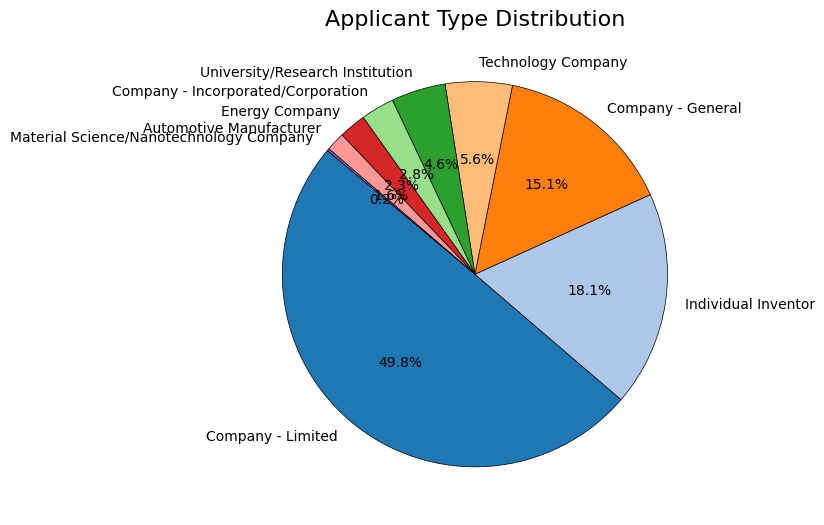

In [549]:
plt.figure(figsize=(8, 8))
plt.pie(
    applicant_type_df['Percentage'],
    labels=applicant_type_df['Applicant Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)

plt.title('Applicant Type Distribution', fontsize=16)
plt.tight_layout()
plt.show()

In [550]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_jurisdictions',
       'family_members', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type'],
      dtype='object')

**top 10% of actors**

In [551]:

applicant_counts = applicants_df['Applicants'].value_counts()


top_10_applicants_df = applicant_counts.head(10).reset_index()
top_10_applicants_df.columns = ['Applicant', 'Patent Count'] 


#total_patents = top_10_applicants_df['Patent Count'].sum()
total_patents = applicants_df['Applicants'].count()

top_10_applicants_df['Contribution (%)'] = (top_10_applicants_df['Patent Count'] / total_patents) * 100


print("Top 10 Applicants by Number of Patents Filed with Contribution:")
top_10_applicants_df

Top 10 Applicants by Number of Patents Filed with Contribution:


,Applicant,Patent Count,Contribution (%)
0,WUHAN GROVE HYDROGEN AUTOMOBILE CO LTD,13,2.280702
1,GUANGDONG HYDROGEN ENERGY SCIENCE & TECH CO LTD,10,1.754386
2,SHANGHAI HYDROGEN MOBILE REFORMER INSTR CO LTD,8,1.403509
3,YOUON TECH CO LTD,6,1.052632
4,GEELY HOLDING GROUP CO LTD \r,6,1.052632
5,CHINA RAILWAY CONSTR GROUP CO \r,6,1.052632
6,CHINA RAILWAY CONSTRUCTION CORP LTD,6,1.052632
7,BEIQI FOTON MOTOR CO LTD,5,0.877193
8,HONDA MOTOR CO LTD,5,0.877193
9,UNIV HENAN SCIENCE & TECH,5,0.877193


In [552]:

applicant_counts = applicants_df['Applicants'].value_counts()


top_10_applicants_df = applicant_counts.head(10).reset_index()
top_10_applicants_df.columns = ['Applicant', 'Patent Count']  


total_patents = applicants_df['Applicants'].count()


total_top_10_patents = top_10_applicants_df['Patent Count'].sum()


percentage_top_10_contribution = (total_top_10_patents / total_patents) * 100


print(f"Percentage Contribution of Top 10 Applicants: {percentage_top_10_contribution:.2f}%")
innovation_cycle = ""
if percentage_top_10_contribution >=50:
    innovation_cycle = "the innovation cycle is Ending"
elif 30 <= percentage_top_10_contribution < 50:
     innovation_cycle = "the innovation cycle is Slowing"
elif 20 <= percentage_top_10_contribution < 30:
     innovation_cycle = "the innovation cycle is Ongoing"
elif 10 <= percentage_top_10_contribution < 20:
     innovation_cycle = "the innovation cycle is Beginning"
elif percentage_top_10_contribution < 10:
     innovation_cycle = "the innovation cycle is Emmerging"

print(innovation_cycle)

Percentage Contribution of Top 10 Applicants: 12.28%
the innovation cycle is Beginning


In [553]:
# Co-Applicant Rate
#num_patents_with_multiple_applicants = df['Applicants'].str.contains('\n').sum()
num_patents_with_multiple_applicants = (df['second applicant'].notna()).sum()
total_patents = len(df)
co_applicant_rate = (num_patents_with_multiple_applicants / total_patents) * 100
print(f"Co-Applicant Rate: {co_applicant_rate:.2f}%")

Co-Applicant Rate: 14.69%


**growth rate**

In [554]:



patent_counts = df.groupby('first filing year').size().reset_index(name='Patent Count')


patent_counts['Cumulative Count'] = patent_counts['Patent Count'].cumsum()


X=patent_counts['Patent Count']
T=patent_counts['Cumulative Count']
patent_counts['GR'] = ((X- X.shift(1)) / ((T+ T.shift(1))/2)).fillna(0)


patent_counts_sorted = patent_counts.sort_values('first filing year', ascending=False)


patent_counts_sorted[['first filing year', 'Patent Count', 'GR']].head(10)


,first filing year,Patent Count,GR
32,2025,1,-0.116818
31,2024,59,0.021436
30,2023,49,-0.026667
29,2022,60,0.027933
28,2021,50,0.029703
27,2020,41,0.011650
26,2019,38,0.027523
25,2018,32,0.032787
24,2017,26,-0.012987
23,2016,28,0.047244


In [555]:
# Filter the DataFrame for the years between 2018 and 2023
df_2018_2023 = patent_counts[(patent_counts['first filing year'] >= 2018) & (patent_counts['first filing year'] <= 2023)]

# Sum the annual growth rates (GR) for the period
growth_rate_2018_2023 = df_2018_2023['GR'].sum()*100

# Print the result
print(f"Growth Rate between 2018 and 2023 (sum of annual GR): {growth_rate_2018_2023:.2f}%")

Growth Rate between 2018 and 2023 (sum of annual GR): 10.29%


In [556]:
from datetime import date
current_year = date.today().year
start_year = current_year - 2
end_year = start_year - 5


print('current: ' , current_year , 'start : ' , start_year , 'end : ' , end_year)

current:  2025 start :  2023 end :  2018


In [557]:


df_2018_2023 = patent_counts[(patent_counts['first filing year'] >= end_year) & (patent_counts['first filing year'] <= start_year)]


    

# Sum the annual growth rates (GR) for the period
GR = df_2018_2023['GR'].sum()*100


print(f"\nGrowth Rate from {end_year} to {start_year}: {GR:.2f}%")


if GR >=50:
    print ("the technology is Booming")
elif 20 <= GR < 50:
    print ("the technology is Trending")
elif 10 <= GR < 20:
    print ("the technology is Quite_Trending")
elif 0 <= GR < 10:
    print ("the technology is Steady")
elif GR < 0:
    print ("the technology is Declining")


Growth Rate from 2018 to 2023: 10.29%
the technology is Quite_Trending


**market cost**


In [558]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_jurisdictions',
       'family_members', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type'],
      dtype='object')

In [559]:
cost = pd.read_csv('corrected-patent-cost-data.csv')

In [560]:
cost.head()

,Country,Years 0.0-1.5,Years 2.0-4.5,Years 5.0-9.5,Years 10.0-14.5,Years 15.0-20.0,Total Cost (US$)
0,US,10500,6000,11500,5000,3000,36000
1,WO,5400,4900,4100,1500,1000,16900
2,EP,7600,8900,12000,9000,5100,42600
3,KR,4000,5000,7500,8400,10500,35400
4,JP,4500,5500,6000,6500,7500,30000


In [561]:
cost.tail()

,Country,Years 0.0-1.5,Years 2.0-4.5,Years 5.0-9.5,Years 10.0-14.5,Years 15.0-20.0,Total Cost (US$)
50,CL,2500,1500,1500,1000,1000,7500
51,BD,1500,1500,1000,1000,1000,6000
52,LU,1000,1500,1000,1000,1000,5500
53,NZ,1000,1000,1500,1000,1500,6000
54,ZA,1000,1500,1000,1000,1000,5500


In [562]:
cost

,Country,Years 0.0-1.5,Years 2.0-4.5,Years 5.0-9.5,Years 10.0-14.5,Years 15.0-20.0,Total Cost (US$)
0,US,10500,6000,11500,5000,3000,36000
1,WO,5400,4900,4100,1500,1000,16900
2,EP,7600,8900,12000,9000,5100,42600
3,KR,4000,5000,7500,8400,10500,35400
4,JP,4500,5500,6000,6500,7500,30000
5,ID,1500,4500,4500,5500,6500,22500
6,VN,1500,4500,3000,4500,6500,20000
7,BR,1500,4500,3000,5500,4500,19000
8,CN,6000,5800,5200,4000,3500,24500
9,RU,1500,4500,2000,4500,5500,18000


In [563]:
import pandas as pd


reference_countries = ['FR', 'EP', 'US', 'CA', 'CN', 'IN', 'KR']


economic_groups = {
    # China-like economies 
    'BR': 'CN', 'RU': 'CN', 'VN': 'CN', 'ZA': 'CN', 'MX': 'CN', 
    'ID': 'CN', 'TR': 'CN', 'TH': 'CN', 'SA': 'CN', 'AR': 'CN',
    'CL': 'CN', 'CO': 'CN', 'PE': 'CN', 'PH': 'CN', 'EG': 'CN',
    'PK': 'CN', 'BD': 'CN', 'MA': 'CN', 'VE': 'CN',
    
    # France-like economies 
    'DE': 'FR', 'GB': 'FR', 'IT': 'FR', 'ES': 'FR', 'NL': 'FR',
    'SE': 'FR', 'CH': 'FR', 'BE': 'FR', 'AT': 'FR', 'DK': 'FR',
    'FI': 'FR', 'NO': 'FR', 'PT': 'FR', 'IE': 'FR', 'GR': 'FR',
    'CZ': 'FR', 'HU': 'FR', 'SK': 'FR', 'PL': 'FR',
    
    # Canada-like economies 
    'AU': 'CA', 'JP': 'KR', 'SG': 'KR', 'TW': 'KR', 'IL': 'KR',
    'NZ': 'CA', 'MY': 'KR', 'HK': 'KR',
    
}


for idx, row in cost.iterrows():
    country = row['Country']
    if country not in reference_countries:
        # Find the mapped reference country
        reference = economic_groups.get(country, 'CN')  
        # Copy costs from the reference country
        ref_row = cost[cost['Country'] == reference].iloc[0]
        cost.loc[idx, 'Years 0.0-1.5':'Total Cost (US$)'] = ref_row['Years 0.0-1.5':'Total Cost (US$)']
        

In [564]:
import pandas as pd
from datetime import datetime

current_year = datetime.now().year


df['Patent Age'] = current_year - df['earliest priority year']


df['Patent Age'] = df['Patent Age'].apply(lambda x: max(0, x) if pd.notnull(x) else x)

In [565]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_jurisdictions',
       'family_members', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type', 'Patent Age'],
      dtype='object')

In [566]:
def assign_cost(row, cost_df):
    country = row['first publication country']
    age = row['Patent Age']
    
    cost_row = cost_df[cost_df['Country'] == country]
    
    if not cost_row.empty:
        
        cost_columns = [
            'Years 0.0-1.5',
            'Years 2.0-4.5', 
            'Years 5.0-9.5',
            'Years 10.0-14.5',
            'Years 15.0-20.0'
        ]
        
        if age > 20:
            return cost_row['Total Cost (US$)'].values[0]
        elif age <= 1.5:
            return cost_row[cost_columns[0]].values[0]
        else:
            # Calculate cumulative sum up to current age bracket
            bracket_index = next(i for i, limit in enumerate([1.5, 4.5, 9.5, 14.5, 20.0]) if age <= limit)
            return cost_row[cost_columns[:bracket_index+1]].sum(axis=1).values[0]
    else:
        return None


In [567]:
df['patent cost'] = df.apply(lambda row: assign_cost(row, cost), axis=1)

# 4. Handle remaining cases
df['patent cost'] = df['patent cost'].fillna(0).astype(int)

In [568]:
zero_cost_count = (df['patent cost'] == 0).sum()
print(f"Number of patents with assigned cost 0: {zero_cost_count}")


Number of patents with assigned cost 0: 0


In [569]:
df.head(2)

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,...,earliest priority year,applicant country,family_jurisdictions,family_members,first applicant,second applicant,first applicant type,second applicant type,Patent Age,patent cost
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,...,2005,US,"[AU, CA, CN, EP, HK, JP, KR, US, WO]","[AU2006295147A1, AU2006295147B2, CA2623398A1, ...",AFS TRINITY POWER CORP [US],None,Company - General,Unknown,20,36000
1,2,Vehicle charging system capable of hydrogen an...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511398B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...","[Y02T10/70 (EP), Y02T10/7072 (EP)]",2023-03-20,2023-03-20,...,2022,KR,[KR],[KR102511398B1],HOGREENAIR CO LTD [KR],None,Company - Limited,Unknown,3,9000


df = df.drop('Assigned Cost' , axis= 1)

In [570]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_jurisdictions',
       'family_members', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type', 'Patent Age',
       'patent cost'],
      dtype='object')

**originality rate** (IPC&Originality_Rate notebook)

In [571]:
OR_df = df.head(50)
#OR_df.to_csv('OR_df.csv' , index=False)

In [577]:
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

class EspacenetORScraper:
    def __init__(self, headless=True):
        """Initialize the scraper with configurable options."""
        options = uc.ChromeOptions()
        if headless:
            options.add_argument('--headless')  # Run in headless mode

        options.add_argument('--disable-blink-features=AutomationControlled')
        self.driver = uc.Chrome(options=options)
        self.driver.set_page_load_timeout(30)
        self.driver.set_window_size(1600, 1300)

    def add_random_delay(self, min_seconds=1, max_seconds=3):
        """Add a random delay to mimic human behavior."""
        time.sleep(random.uniform(min_seconds, max_seconds))

    def get_page_html(self, url, retries=3):
        """
        Navigate to the given URL and return the page HTML.
        Retry the operation if a timeout occurs.

        Args:
            url (str): The URL to navigate to.
            retries (int): Number of retry attempts.

        Returns:
            str: The page HTML, or None if all retries fail.
        """
        for attempt in range(retries):
            try:
                print(f"Navigating to: {url} (Attempt {attempt + 1})")
                self.driver.get(url)
                WebDriverWait(self.driver, 30).until(
                    EC.presence_of_element_located((By.TAG_NAME, "body"))
                )

                # Add a random delay to mimic human behavior
                self.add_random_delay(3, 5)

                # Return the page HTML
                return self.driver.page_source

            except TimeoutException:
                print(f"Timed out waiting for the page to load. Retrying ({attempt + 1}/{retries})...")
                if attempt == retries - 1:
                    print("Max retries reached. Unable to load the page.")
                    return None
            except Exception as e:
                print(f"An error occurred: {e}")
                return None

    def click_citations_tab_and_get_html(self, retries=3):
        """
        Click the "Citations" tab and return the HTML content of the table's tbody.
        If no citations are found (error message is present), return None.

        Args:
            retries (int): Number of retry attempts.

        Returns:
            str or None: The HTML content of the table's tbody, or None if no citations are found.
        """
        for attempt in range(retries):
            try:
                # Wait for the "Citations" tab to be clickable
                citations_tab = WebDriverWait(self.driver, 30).until(
                    EC.element_to_be_clickable((By.XPATH, "//li[@role='tab']//span[contains(text(), 'Citations')]"))
                )
                print("Citations tab found. Clicking...")
                citations_tab.click()
                self.add_random_delay(2, 4)

                # Wait for the wrapper to load
                WebDriverWait(self.driver, 30).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "div.wrapper--m6N288zA"))
                )
                print("Wrapper found.")

                # Check if the table exists inside the wrapper
                table = self.driver.find_elements(By.CSS_SELECTOR, "div.wrapper--m6N288zA table.table__table--8dvWEm4j")
                if table:
                    print("Table found inside the wrapper.")
                    # Wait for the table's tbody to load
                    WebDriverWait(self.driver, 30).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, "table.table__table--8dvWEm4j tbody.table__body--wKJVkwCZ"))
                    )
                    print("Table body found.")

                    # Add a delay to ensure the table is fully rendered
                    self.add_random_delay(2, 4)

                    # Extract the HTML content of the table's tbody
                    tbody = self.driver.find_element(By.CSS_SELECTOR, "table.table__table--8dvWEm4j tbody.table__body--wKJVkwCZ")
                    return tbody.get_attribute("outerHTML")
                else:
                    # Check if the error message exists
                    error_message = self.driver.find_elements(By.CSS_SELECTOR, "div.wrapper--m6N288zA div.error__container--85Brg4Ek")
                    if error_message:
                        print("No citations found for this patent.")
                        return None  # Return None if no citations are found
                    else:
                        print("Neither table nor error message found. Retrying...")
                        continue  # Retry the loop

            except TimeoutException:
                print(f"Timed out waiting for the 'Citations' tab to load. Retrying ({attempt + 1}/{retries})...")
                if attempt == retries - 1:
                    print("Max retries reached. Unable to load the 'Citations' tab.")
                    return None
            except Exception as e:
                print(f"An error occurred while clicking the 'Citations' tab: {e}")
                return None

    def parse_tbody_to_dataframe(self, tbody_html):
        """
        Parse the tbody HTML and convert it into a pandas DataFrame.

        Args:
            tbody_html (str): The HTML content of the tbody.

        Returns:
            pd.DataFrame: A DataFrame containing the extracted data.
        """
        soup = BeautifulSoup(tbody_html, 'html.parser')
        rows = soup.find_all('tr', class_='table__row--qDMbhLBz')

        data = []
        for row in rows:
            cells = row.find_all('td', class_='table__cell--9cdFfes6')
            row_data = []
            for cell in cells:
                # Extract text from the span if it exists, otherwise extract text from the cell
                span = cell.find('span')
                if span:
                    row_data.append(span.get_text(strip=True))
                else:
                    row_data.append(cell.get_text(strip=True))
            data.append(row_data)

        # Define column names based on the table structure
        columns = [
            "CitationOrigin", "Publication", "Title", "Earliest PriorityDate",
            "PublicationDate", "Applicants", "IPC", "CPC"
        ]

        # Create a DataFrame
        df = pd.DataFrame(data, columns=columns)
        return df

    def close(self):
        """Close the browser when done."""
        if self.driver:
            self.driver.quit()


if __name__ == '__main__':

    #df = pd.read_csv('OR_df_exp.csv')  # Replace with your actual file path
    
    # Make sure the DataFrame has the required columns
    required_columns = ['Family number', 'first publication number']
    if not all(col in OR_df.columns for col in required_columns):
        raise ValueError(f"Input DataFrame must contain these columns: {required_columns}")
    
    # Initialize the scraper
    scraper = EspacenetORScraper(headless=False)  # Set headless to False to see the browser in action

    # Create a new empty DataFrame to store the results
    # Initialize with the same columns as the input DataFrame plus the new 'citations IPC' column
    result_or_df = pd.DataFrame(columns=df.columns.tolist() + ['citations IPC'])

    # Counter to keep track of non-empty lists in the 'citations IPC' column
    non_empty_count = 0

    try:
        # Iterate over each row in the original DataFrame
        for index, row in OR_df.iterrows():
            # Stop if we have at least 30 rows with non-empty citations
            if non_empty_count >= 30:
                break

            # Construct the URL for the current patent
            url = f"https://worldwide.espacenet.com/patent/search/family/{row['Family number']}/publication/{row['first publication number']}?q=pn%3D{row['first publication number']}"
            print(f"Processing patent: {row['first publication number']}")

            # Get the page HTML
            html = scraper.get_page_html(url, retries=3)
            if html:
                print("Page HTML retrieved successfully.")

                # Click the "Citations" tab and get its HTML content
                tbody_html = scraper.click_citations_tab_and_get_html(retries=3)
                if tbody_html:
                    print(f"Citations tab tbody HTML retrieved successfully for {row['first publication number']}.")

                    # Parse the tbody HTML and convert it into a DataFrame
                    citations_df = scraper.parse_tbody_to_dataframe(tbody_html)
                    if citations_df is not None and not citations_df.empty:  # Check if citations were found
                        print(f"DataFrame created successfully for {row['first publication number']}.")

                        # Extract the IPC classes from the citations DataFrame
                        ipc_list = citations_df["IPC"].tolist()

                        # Create a new row as a dictionary
                        new_row = row.to_dict()
                        new_row['citations IPC'] = ipc_list

                        # Append the row to the result DataFrame - FIX FOR THE ERROR
                        # Create a temporary DataFrame with the new row and ensure index is unique
                        temp_df = pd.DataFrame([new_row])
                        result_or_df = pd.concat([result_or_df, temp_df], ignore_index=True)

                        # Increment the non-empty count
                        non_empty_count += 1
                        print(f"Added patent {row['first publication number']} with {len(ipc_list)} citation IPCs. Total with citations: {non_empty_count}")
                    else:
                        print(f"No citations found for {row['first publication number']}.")
                else:
                    print(f"No citations found for {row['first publication number']}.")

    finally:
        # Close the browser
        scraper.close()
        print("Scraper closed.")

        # Display the resulting DataFrame
        if not result_or_df.empty:
            print(result_or_df[['first publication number', 'citations IPC']])


            # Save the resulting DataFrame to a CSV file
            #result_df.to_csv("patents_with_citations_ipc.csv", index=False, encoding="utf-8")
            #print("DataFrame saved to 'patents_with_citations_ipc.csv'.")
        else:
            print("No results collected. Result DataFrame is empty.")

KeyboardInterrupt: 

In [ ]:
def process_citations(citations):
    # Initialize a set to store unique citations
    processed = set()
    
    # Iterate over each citation string
    for citation in citations:
        # Split the citation string by commas
        parts = citation.split(',')
        # Add each part to the set (strip whitespace)
        for part in parts:
            # Split by '/' and take the first part, then strip whitespace
            processed.add(part.split('/')[0].strip())

    unique_citaions = list(processed)
    unique_citaions.sort()
    
    # Convert the set back to a list
    return unique_citaions

In [ ]:
result_or_df['citations IPC'] = result_or_df['citations IPC'].apply(process_citations)
result_or_df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,...,earliest priority year,applicant country,family_members,first applicant,second applicant,first applicant type,second applicant type,Patent Age,patent cost,citations IPC
0,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,...,2022,KR,[KR20230163874A],SON JEONG KI [KR],None,Individual Inventor,Unknown,3,9000,"[B60L11, B60L53, B60M7, F16H7, G06Q50, H01M10,..."
1,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,...,2022,KR,[KR102511391B1],HOGREENAIR CO LTD [KR],None,Company - Limited,Unknown,3,9000,"[B60K15, B60L3, B60L50, B60L53, B60P3, C25B1, ..."
2,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,SIGNET EV INC [KR] \nSIGNET ENERGY [KR],US2022140365A1,2020-11-02,"[H01M16/00, H01M8/04828, H02J7/34]","[B60K15/03006 (KR), B60L53/20 (KR), B60L53/50 ...",2022-05-05,2021-03-17,...,2020,KR,"[JP2022073928A, ;, KR102228132B1, ;, US2022140...",SIGNET EV INC [KR],SIGNET ENERGY [KR],Company - Incorporated/Corporation,Energy Company,5,28000,"[B60L50, B60L53, B60S5, B64B1, B64C39, B64D27,..."
3,6,Method for quickly charging electric vehicle l...,CHENG HUANGREN \nHAN YIXI \nLI QINGBAO \nZHAO XI,TIANJIN YADI IND CO LTD,CN108550935A,2018-04-19,[H01M10/44],"[H01M10/445 (CN), Y02E60/10 (EP)]",2018-09-18,2018-09-18,...,2018,NaN,[CN108550935A],TIANJIN YADI IND CO LTD,None,Company - Limited,Unknown,7,17000,"[H01M10, H02J7]"
4,7,Stable Charging Device for Methanol Hydrogen P...,CHEN JIEPING,ZHEJIANG QINGGU NEW ENERGY AUTOMOBILE CO LTD,CN109263516A \nCN109263516B,2018-10-30,"[B60L58/31, H01M8/04082, H01M8/0612]","[H01M8/04201 (CN), H01M8/0618 (CN), H01M8/0625...",2019-01-25 \n2024-03-15,2019-01-25,...,2018,NaN,"[CN109263516A, ;, CN109263516B]",ZHEJIANG QINGGU NEW ENERGY AUTOMOBILE CO LTD,None,Company - Limited,Unknown,7,17000,"[, B60L1, B60L11, B60L15, B60L50, B60L58, H01M..."


def process_ipc_codes(ipc_list):
    """
    Process a list of IPC codes with country codes in parentheses.
    
    Args:
        ipc_list (list or str): A list of IPC codes in the format "CODE (COUNTRY)" or a string
                               representation of such a list.
                               
    Returns:
        list: The original list without any modifications.
    
    Example:
        >>> input_list = ["H01M8/04201 (CN)", "H01M8/0618 (CN)", "H01M8/0625 (CN)", 
                          "Y02E60/50 (EP)", "Y02T90/40 (EP)"]
        >>> process_ipc_codes(input_list)
        ['H01M8/04201 (CN)', 'H01M8/0618 (CN)', 'H01M8/0625 (CN)', 'Y02E60/50 (EP)', 'Y02T90/40 (EP)']
    """
    # If the input is a string (as might happen if extracted from text),
    # convert it to a list by parsing the string
    if isinstance(ipc_list, str):
        # Check if it's a string representation of a list (starts with [ and ends with ])
        if ipc_list.strip().startswith('[') and ipc_list.strip().endswith(']'):
            # Remove the brackets and split by commas
            # Use eval carefully - only if you're sure the input is safe
            try:
                ipc_list = eval(ipc_list)
            except:
                # If eval fails, do a simple string split and clean up
                content = ipc_list.strip()[1:-1]  # Remove brackets
                ipc_list = [item.strip().strip("'\"") for item in content.split(',')]
    
    # Ensure the result is a list
    if not isinstance(ipc_list, list):
        ipc_list = [ipc_list]
    
    # Return the original list (as per your request)
    return ipc_list

# Example usage:
if __name__ == "__main__":
    input_list = ["H01M8/04201 (CN)", "H01M8/0618 (CN)", "H01M8/0625 (CN)", 
                  "Y02E60/50 (EP)", "Y02T90/40 (EP)"]
    result = process_ipc_codes(input_list)
    print(result)
    
    # Test with a string input
    string_input = "['H01M8/04201 (CN)', 'H01M8/0618 (CN)', 'H01M8/0625 (CN)', 'Y02E60/50 (EP)', 'Y02T90/40 (EP)']"
    result2 = process_ipc_codes(string_input)
    print(result2)

In [ ]:
len(result_or_df)

26

improved ipc codes function

In [ ]:
import ast

def process_ipc_codes(ipc_list):
    """
    Process a list of IPC codes with country codes in parentheses.
    
    Args:
        ipc_list (list or str): A list of IPC codes in the format "CODE (COUNTRY)" or a string
                               representation of such a list.
                               
    Returns:
        list: The original list without any modifications.
    
    Example:
        >>> input_list = ["H01M8/04201 (CN)", "H01M8/0618 (CN)", "H01M8/0625 (CN)", 
                          "Y02E60/50 (EP)", "Y02T90/40 (EP)"]
        >>> process_ipc_codes(input_list)
        ['H01M8/04201 (CN)', 'H01M8/0618 (CN)', 'H01M8/0625 (CN)', 'Y02E60/50 (EP)', 'Y02T90/40 (EP)']
    """
    # If input is a string, try to safely convert it into a list
    if isinstance(ipc_list, str):
        ipc_list = ipc_list.strip()
        
        if ipc_list.startswith("[") and ipc_list.endswith("]"):
            try:
                ipc_list = ast.literal_eval(ipc_list)  # Safe alternative to eval()
            except (SyntaxError, ValueError):
                # If parsing fails, fallback to a simple split method
                ipc_list = [item.strip().strip("'\"") for item in ipc_list[1:-1].split(",")]

    # Ensure output is a list
    return ipc_list if isinstance(ipc_list, list) else [ipc_list]

# # Example usage:
# if __name__ == "__main__":
#     input_list = ["H01M8/04201 (CN)", "H01M8/0618 (CN)", "H01M8/0625 (CN)", 
#                   "Y02E60/50 (EP)", "Y02T90/40 (EP)"]
#     result = process_ipc_codes(input_list)
#     print(result)
    
#     # Test with a string input
#     string_input = "['H01M8/04201 (CN)', 'H01M8/0618 (CN)', 'H01M8/0625 (CN)', 'Y02E60/50 (EP)', 'Y02T90/40 (EP)']"
#     result2 = process_ipc_codes(string_input)
#     print(result2)


In [ ]:
result_or_df['IPC'] = result_or_df['IPC'].apply(process_ipc_codes)
result_or_df['IPC'] = result_or_df['IPC'].apply(process_citations)
result_or_df['CPC'] = result_or_df['CPC'].apply(process_ipc_codes)
result_or_df['CPC'] = result_or_df['CPC'].apply(process_citations)

In [ ]:
result_or_df['IPC'].head(2)

0                 [B60L53, G06Q20, G06Q50]
1    [B60L3, B60L53, B60L58, H01M8, H05K7]
Name: IPC, dtype: object

In [ ]:
citations_IPC_df= result_or_df[['first publication number','IPC','citations IPC']]
citations_IPC_df['IPC count']= citations_IPC_df['IPC'].apply(len)
citations_IPC_df['citations IPC count']= citations_IPC_df['citations IPC'].apply(len)

C:\Users\tasni\AppData\Local\Temp\ipykernel_388\2742703499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citations_IPC_df['IPC count']= citations_IPC_df['IPC'].apply(len)
C:\Users\tasni\AppData\Local\Temp\ipykernel_388\2742703499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citations_IPC_df['citations IPC count']= citations_IPC_df['citations IPC'].apply(len)


In [ ]:
#remove rows in whitch IPC count > citations IPC count
citations_IPC_df = citations_IPC_df[citations_IPC_df['IPC count'] <= citations_IPC_df['citations IPC count']]

In [ ]:

citations_IPC_df['%citaions'] = citations_IPC_df['IPC count'] / citations_IPC_df['citations IPC count']

In [ ]:
citations_IPC_df

,first publication number,IPC,citations IPC,IPC count,citations IPC count,%citaions
0,KR20230163874A,"[B60L53, G06Q20, G06Q50]","[B60L11, B60L53, B60M7, F16H7, G06Q50, H01M10,...",3,8,0.375000
1,KR102511391B1,"[B60L3, B60L53, B60L58, H01M8, H05K7]","[B60K15, B60L3, B60L50, B60L53, B60P3, C25B1, ...",5,15,0.333333
2,US2022140365A1,"[H01M16, H01M8, H02J7]","[B60L50, B60L53, B60S5, B64B1, B64C39, B64D27,...",3,22,0.136364
3,CN108550935A,[H01M10],"[H01M10, H02J7]",1,2,0.500000
4,CN109263516A,"[B60L58, H01M8]","[, B60L1, B60L11, B60L15, B60L50, B60L58, H01M...",2,9,0.222222
5,US2013093378A1,[H02J7],"[B60L11, B60L8, B63C7, B63H11, B63H13, B63H21,...",1,27,0.037037
6,CN112606713A,"[B60L50, B60L58, H02J7, H02P27]","[B60K1, B60L11, B60L50, B60L58, B60L7, H01M10,...",4,10,0.400000
7,WO2023128748A1,"[B60K6, B60L15, B60L53, B60L58]","[B01J19, B01J7, B60K1, B60L1, B60L11, B60L58, ...",4,15,0.266667
8,KR20210053589A,"[B60L58, B60L7, B60T13]","[B60L11, B60L15, B60L7]",3,3,1.000000
9,CN108674229A,"[B60L50, B60L53, B60S5, H02J7]","[B60C19, B60K15, B60L11, B60S5, B65B1, B65B3, ...",4,17,0.235294


In [ ]:
#originality rate calculation 
citations_IPC_df['%S²'] = citations_IPC_df['%citaions']**2
mean_S_square = citations_IPC_df['%S²'].sum()
num_rows = len(citations_IPC_df)
original_rate = 1- mean_S_square/num_rows
print('num rows = ' , num_rows)
print('OR = ' ,' {:.2f}%'.format(original_rate) )

num rows =  25
OR =   0.80%


**family analysis**

family_df = pd.read_csv('family_df.csv')
family_df = family_df.drop('Unnamed: 0' , axis= 1)
family_df.columns

In [ ]:
family_df= df.copy()

In [ ]:
df['family_members']

0                                                    []
1                                      [KR20230163874A]
2                                       [KR102511391B1]
3     [KR100949260B1, ;, WO2011019133A2, ;, WO201101...
4     [JP2022073928A, ;, KR102228132B1, ;, US2022140...
                            ...                        
94                                       [CN108258273A]
95                                       [CN108258278A]
96                                       [CN209675993U]
97                   [KR101813231B1, ;, KR20170040143A]
98                                       [CN207442478U]
Name: family_members, Length: 99, dtype: object

In [ ]:
# 1. Calculate number of family members per row
family_df['family_members_count'] = family_df['family_members'].str.len()

# 2. Calculate total across all patents
total_family_members = family_df['family_members_count'].sum()

print(f"Total family members across all patents: {total_family_members}")


Total family members across all patents: 251


***market strategy***

In [ ]:
import pandas as pd


market_value = df['patent cost'].sum()


df['Patent Value'] = df['patent cost']
#market rate fixed
market_rate = total_family_members / len(df)

Patent_Value=market_value/len(df)

print(f"Market Value: ${market_value:,.2f}")
print(f"Market Rate: ${market_rate:,.2f} per patent")
print(f"Mean Value of Patents: ${Patent_Value:,.2f}")



Market Value: $1,918,300.00
Market Rate: $2.54 per patent
Mean Value of Patents: $19,376.77


In [ ]:
len(family_df)

99

In [ ]:
import pandas as pd
import numpy as np
family_df_copy = family_df.copy()



In [ ]:
family_df_copy = family_df_copy.dropna(subset=['family_members'])


In [ ]:
family_df_copy = family_df_copy[family_df_copy['family_members'].apply(lambda x: len(x) > 0)]


In [ ]:
family_df_copy.head(2)

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,...,earliest priority year,applicant country,family_members,first applicant,second applicant,first applicant type,second applicant type,Patent Age,patent cost,family_members_count
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,...,2022,KR,[KR20230163874A],SON JEONG KI [KR],None,Individual Inventor,Unknown,3,9000,1
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,...,2022,KR,[KR102511391B1],HOGREENAIR CO LTD [KR],None,Company - Limited,Unknown,3,9000,1


In [ ]:
family_df_copy = family_df_copy[family_df_copy['family_members'] != ';']

In [ ]:
# Inspect the first few rows of the 'family_members' column
print(family_df_copy['family_members'].head())

1                                     [KR20230163874A]
2                                      [KR102511391B1]
3    [KR100949260B1, ;, WO2011019133A2, ;, WO201101...
4    [JP2022073928A, ;, KR102228132B1, ;, US2022140...
5                                       [CN108550935A]
Name: family_members, dtype: object


In [ ]:
import re
import ast

def extract_country_codes(family_data):
    """
    Extract country codes from the family_members column.
    Handles both string representations of lists and actual lists.
    """
    # If the input is a string representation of a list
    if isinstance(family_data, str):
        # Check if it's an empty list string
        if family_data == '[]':
            return []
        # Use the string-based extraction function
        return extract_country_codes_from_str(family_data)
    
    # If the input is an actual list
    elif isinstance(family_data, list):
        # Use the list-based extraction function
        return extract_country_codes_from_list(family_data)
    
    # If the input is neither, return an empty list
    return []

def extract_country_codes_from_str(family_str):
    """
    Extract country codes from a string representation of a list.
    """
    if not isinstance(family_str, str) or family_str == '[]':
        return []
    
    # This pattern finds anything that looks like a patent number within quotes
    pattern = r"'([A-Z]{2}[A-Z0-9]+)'"
    matches = re.findall(pattern, family_str)
    
    # Extract the first two characters for country codes
    country_codes = [match[:2] for match in matches]
    return country_codes

def extract_country_codes_from_list(family_members):
    """
    Extract country codes from an actual list of patent numbers.
    """
    if not isinstance(family_members, list) or not family_members:
        return []
    
    # This pattern extracts the 2-letter country code from patent numbers
    country_codes = []
    for item in family_members:
        if isinstance(item, str):  # Ensure the item is a string
            match = re.match(r'^([A-Z]{2})[A-Z0-9]+', item)  # Match the first 2 letters
            if match:
                country_codes.append(match.group(1))  # Append the country code
    return country_codes

In [ ]:
import ast

def clean_family_members(family_data):
    """
    Clean the family_members column:
    - Convert string representations of lists to actual lists.
    - Remove semicolons and empty strings.
    """
    # If the input is a string, try to evaluate it as a list
    if isinstance(family_data, str):
        try:
            family_data = ast.literal_eval(family_data)  # Convert string to list
        except (ValueError, SyntaxError):
            # If evaluation fails, treat it as a single-item list
            family_data = [family_data]
    
    # If the input is already a list, proceed
    if isinstance(family_data, list):
        # Remove semicolons and empty strings
        cleaned_list = [item.replace(';', '') for item in family_data if item.replace(';', '') != '']
        return cleaned_list
    
    # If the input is neither a string nor a list, return an empty list
    return []

# Apply the cleaning function to the family_members column
family_df_copy['family_members'] = family_df_copy['family_members'].apply(clean_family_members)

# Inspect the results
family_df_copy[['family_members']].sample(5)

,family_members
8,[CN214240460U]
95,[CN108258278A]
84,[CN108986610A]
88,"[KR102516447B1, KR102608228B1, US2024157182A1]"
27,"[CN118372636A, US12005772B2, US2022402354A1]"


In [ ]:
family_df_copy['country_codes'] = family_df_copy['family_members'].apply(extract_country_codes)

# Inspect the results
family_df_copy[['family_members', 'country_codes']].sample(5)

,family_members,country_codes
91,"[US2003188900A1, US6536547B1, US6945345B2]","[US, US, US]"
93,"[CN105946607A, CN105946607B]","[CN, CN]"
50,[CN202261108U],[CN]
80,[CN206968419U],[CN]
25,"[US2010304228A1, US8153309B2]","[US, US]"


In [ ]:
family_df_copy[['family_members', 'country_codes']].iloc[55]

family_members    [CN105655668A, CN105655668B, WO2017148043A1]
country_codes                                     [CN, CN, WO]
Name: 58, dtype: object

In [ ]:
family_df_copy.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_members',
       'first applicant', 'second applicant', 'first applicant type',
       'second applicant type', 'Patent Age', 'patent cost',
       'family_members_count', 'country_codes'],
      dtype='object')

In [ ]:
family_df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_members',
       'first applicant', 'second applicant', 'first applicant type',
       'second applicant type', 'Patent Age', 'patent cost',
       'family_members_count'],
      dtype='object')

In [ ]:
family_df_copy['family_size'] = family_df_copy['family_members'].apply(len)
print(family_df_copy[['Publication number', 'family_size']].head())

                Publication number  family_size
1                   KR20230163874A            1
2                    KR102511391B1            1
3  WO2011019133A2 \nWO2011019133A3            3
4                   US2022140365A1            3
5                     CN108550935A            1


In [ ]:
unique_family_members = set(item for sublist in family_df_copy['family_members'] for item in sublist)
print(f"Total unique family members: {len(unique_family_members)}")

Total unique family members: 171


Relationship between filing countries and family countries

In [ ]:
import pandas as pd


all_country_codes = [code for sublist in family_df_copy['country_codes'] for code in sublist]


family_counts_df = pd.Series(all_country_codes).value_counts().reset_index()
family_counts_df.columns = ['country_code', 'member_count']


C:\Users\tasni\AppData\Local\Temp\ipykernel_388\1863737735.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_code', y='member_count', data=family_counts_df, palette='viridis')


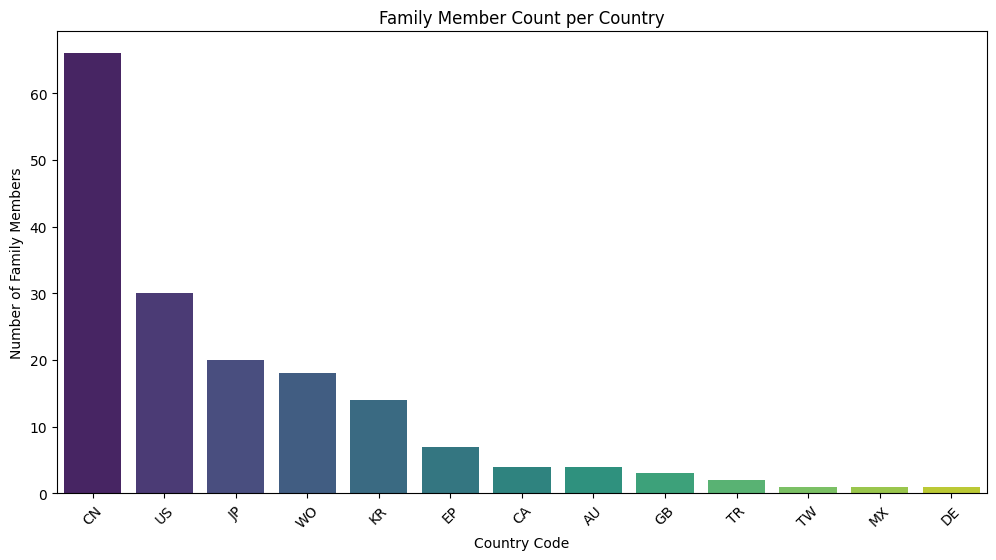

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))


sns.barplot(x='country_code', y='member_count', data=family_counts_df, palette='viridis')

plt.xlabel('Country Code')
plt.ylabel('Number of Family Members')
plt.title('Family Member Count per Country')
plt.xticks(rotation=45)  

plt.show()


market rate : toatl fam / total first filing

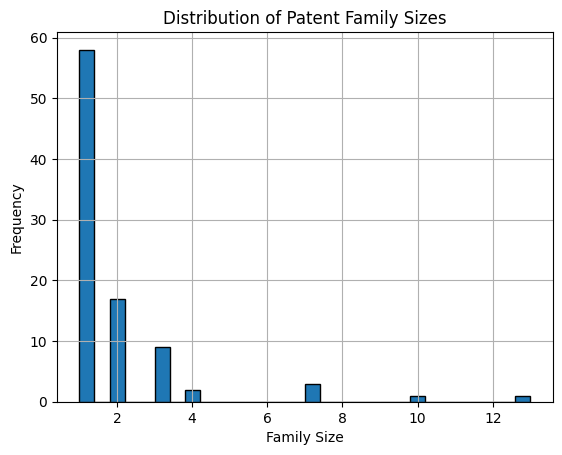

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of family sizes
family_df_copy['family_size'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Patent Family Sizes')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate filing counts by country
country_counts = pd.DataFrame(df['first publication country'].value_counts()).reset_index()
country_counts.columns = ['Country', 'Filing Counts']

# Display the resulting DataFrame
print(country_counts)


  Country  Filing Counts
0      CN             54
1      US             17
2      JP             12
3      WO              7
4      KR              7
5      TW              1
6      GB              1


country_counts['filing counts'] = df['first publication country'].value_counts().reset_index()

In [ ]:
country_counts.head()

,Country,Filing Counts
0,CN,54
1,US,17
2,JP,12
3,WO,7
4,KR,7


In [ ]:
patent_counts.head()

,first filing year,Patent Count,Cumulative Count,GR
0,1990,1,1,0.000000
1,1997,2,3,0.500000
2,1999,3,6,0.222222
3,2000,3,9,0.000000
4,2003,2,11,-0.100000


**visualisations and plots**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [ ]:
df.head(1)

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,...,earliest priority year,applicant country,family_members,first applicant,second applicant,first applicant type,second applicant type,Patent Age,patent cost,Patent Value
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,...,2005,US,[],AFS TRINITY POWER CORP [US],None,Company - General,Unknown,20,36000,36000


In [ ]:
applicant_counts

Applicants
GUANGDONG HYDROGEN ENERGY SCIENCE & TECH CO LTD    6
HOGREENAIR CO LTD [KR]                             2
YAZAKI CORP                                        2
FOSHAN XIANHU LABORATORY                           2
NIPPON SOKEN                                       2
                                                  ..
MEANEY JR DANIEL J [US]                            1
CHEJIXIU AUTOMOBILE TECH CO LTD                    1
SJZ-HANTREND ENERGY TECH CO LTD                    1
BEIJING BOYANG DINGRONG PV TECH CO LTD             1
LI KUNCHUN                                         1
Name: count, Length: 98, dtype: int64

In [ ]:
top_10_applicants_df

,Applicant,Patent Count
0,GUANGDONG HYDROGEN ENERGY SCIENCE & TECH CO LTD,6
1,HOGREENAIR CO LTD [KR],2
2,YAZAKI CORP,2
3,FOSHAN XIANHU LABORATORY,2
4,NIPPON SOKEN,2
5,BEIQI FOTON MOTOR CO LTD,2
6,HONDA MOTOR CO LTD,2
7,YOUON TECH CO LTD,2
8,HONDA MOTOR CO LTD [JP],2
9,PAHPS [KR],2


C:\Users\tasni\AppData\Local\Temp\ipykernel_388\3140164756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Patent Count', y='Applicant', data=top_10_applicants_df, palette='magma')


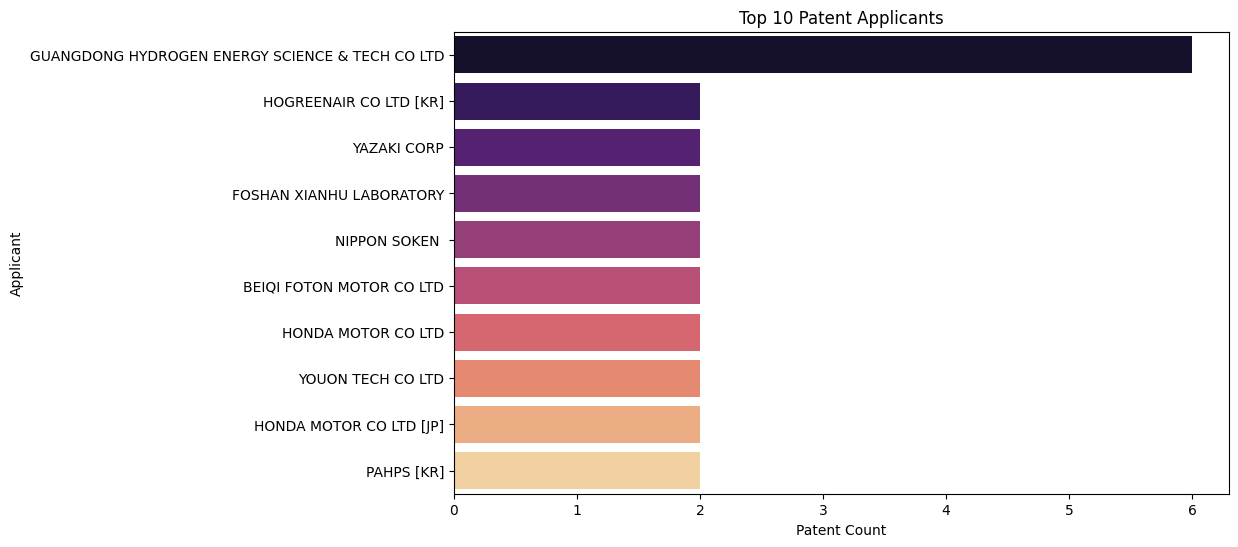

In [ ]:
#top 10 applicants 


plt.figure(figsize=(10, 6))
sns.barplot(x='Patent Count', y='Applicant', data=top_10_applicants_df, palette='magma')
plt.title('Top 10 Patent Applicants')
plt.show()

Network Analysis of Applicants

Creating Collaboration Network Graph...


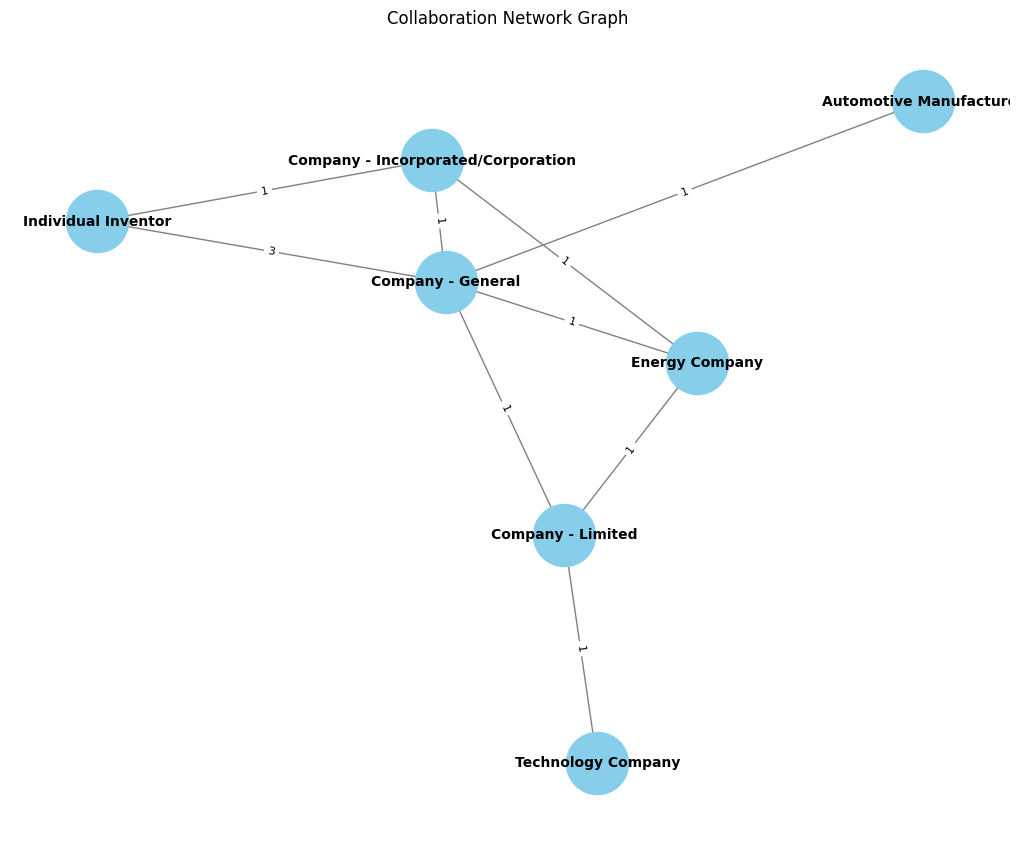

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def create_collaboration_network(df):
    """
    Creates and visualizes a collaboration network graph between 'First Applicant Type' and 'Second Applicant Type',
    after removing rows that contain 'Unknown'.
    """
    print("Creating Collaboration Network Graph...")

    
    df_filtered = df.copy()

    
    df_filtered = df_filtered[
        (df_filtered['first applicant type'] != "Unknown") & 
        (df_filtered['second applicant type'] != "Unknown")
    ]

   
    df_filtered = df_filtered[['first applicant type', 'second applicant type']].dropna()

    
    G = nx.Graph()

    # Add edges (collaborations)
    for _, row in df_filtered.iterrows():
        applicant1, applicant2 = row['first applicant type'], row['second applicant type']
        if applicant1 != applicant2:  
            if G.has_edge(applicant1, applicant2):
                G[applicant1][applicant2]['weight'] += 1 
            else:
                G.add_edge(applicant1, applicant2, weight=1)

    
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  

    
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", edge_color="gray", font_size=10, font_weight="bold")

    
    edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Collaboration Network Graph ")
    plt.show()

    return G  

create_collaboration_network(df)


**top IPC codes**

In [ ]:
df['IPC'].head(2)

0                                           [H04B1/20]
1    [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...
Name: IPC, dtype: object

In [ ]:
import pandas as pd
from ast import literal_eval

# Convert string representations of lists into actual lists
df['IPC'] = df['IPC'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

# Explode the IPC lists into individual rows
all_ipc = df['IPC'].explode()

# Count frequencies and extract sorted list of most common IPC classes
most_common_ipc = all_ipc.value_counts().index.tolist()


C:\Users\tasni\AppData\Local\Temp\ipykernel_388\3970486454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Main IPC', data=main_ipc_df, palette='plasma')


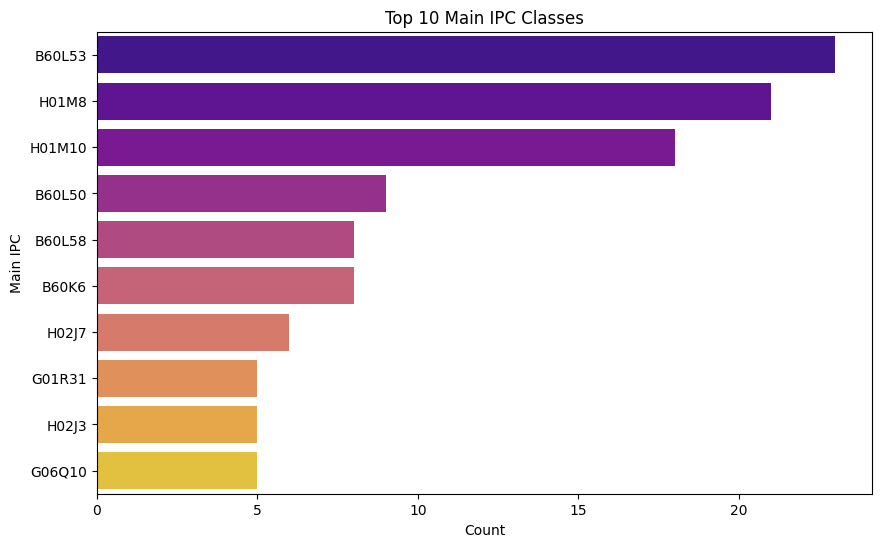

In [ ]:

main_ipc = [code.split('/')[0] for code in most_common_ipc]

# Count main CPC frequencies
main_ipc_counts = Counter(main_ipc).most_common(10)
main_ipc_df = pd.DataFrame(main_ipc_counts, columns=['Main IPC', 'Count'])


plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Main IPC', data=main_ipc_df, palette='plasma')
plt.title('Top 10 Main IPC Classes')
plt.show()

geographical analysis 

In [ ]:
country_counts.head()

,Country,Filing Counts
0,CN,54
1,US,17
2,JP,12
3,WO,7
4,KR,7


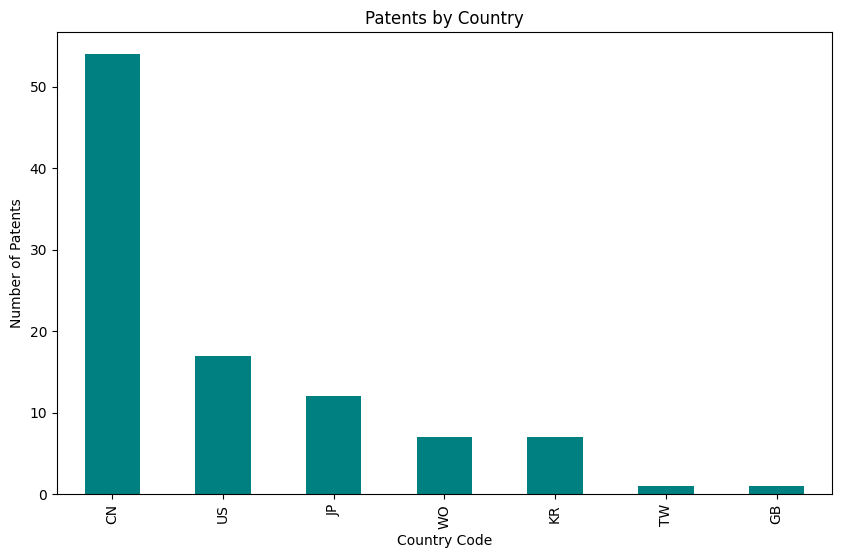

In [ ]:
# Extract country codes
df['Country'] = df['Publication number'].str[:2]

# Count patents by country
pub_country_counts = df['Country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
pub_country_counts.plot(kind='bar', color='teal')
plt.title('Patents by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Patents')
plt.show()

**market and R&D**

In [ ]:
df = df.reset_index(drop=True)
family_df_copy = family_df_copy.reset_index(drop=True)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Build a relationship DataFrame that links each origin country to its filing countries.
records = []
for idx, row in family_df_copy.iterrows():
    # Get the origin country for this patent 
    origin = df.loc[idx, 'first publication country']
    # Record an entry for each filing country in the family
    for filing in row['country_codes']:
        records.append({'origin_country': origin, 'filing_country': filing})

relation_df = pd.DataFrame(records)

# Step 3: Group by origin and filing country to count the occurrences
grouped_df = relation_df.groupby(['origin_country', 'filing_country']).size().reset_index(name='count')

# Step 4: Pivot the grouped DataFrame so that each row is an origin country and each column is a filing country
pivot_df = grouped_df.pivot(index='origin_country', columns='filing_country', values='count').fillna(0)

import matplotlib.pyplot as plt

# Sort the pivot table by total filings per origin country 
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=True).index]





In [ ]:
grouped_df.head(10)

,origin_country,filing_country,count
0,CN,AU,4
1,CN,CA,3
2,CN,CN,32
3,CN,DE,1
4,CN,EP,4
5,CN,GB,2
6,CN,JP,10
7,CN,KR,6
8,CN,MX,1
9,CN,TR,2


In [ ]:
pivot_df.head()

filing_country,AU,CA,CN,DE,EP,GB,JP,KR,MX,TR,TW,US,WO
origin_country,,,,,,,,,,,,,
TW,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GB,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
KR,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
WO,0.0,0.0,4.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0
US,0.0,1.0,15.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,3.0


<Figure size 1200x800 with 0 Axes>

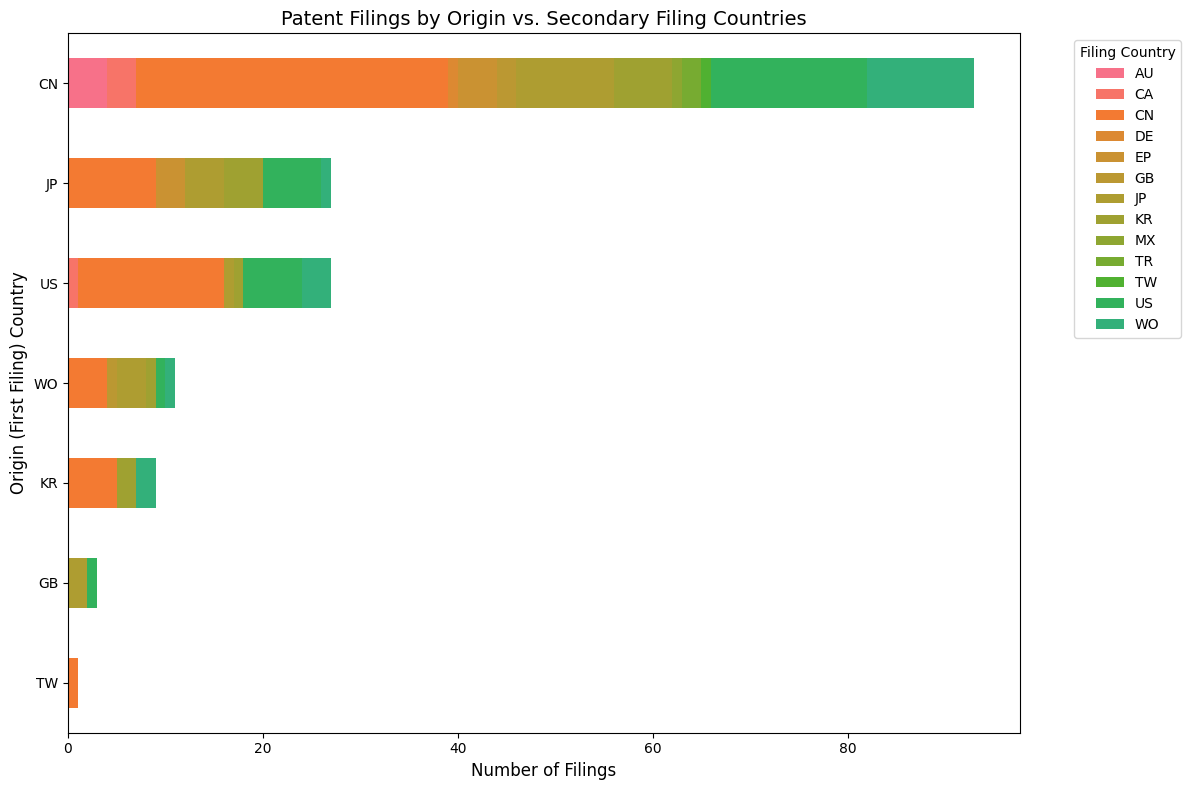

In [ ]:
# Plot the stacked horizontal bar chart
plt.figure(figsize=(12, 8))
# pivot_df.plot(kind='barh', stacked=True, colormap='tab20', figsize=(12, 8))
colors = sns.color_palette("husl", 30)  # Generates 30 distinct colors
pivot_df.plot(kind='barh', stacked=True, color=colors, figsize=(12, 8))

# Titles and labels
plt.title('Patent Filings by Origin vs. Secondary Filing Countries', fontsize=14)
plt.xlabel('Number of Filings', fontsize=12)
plt.ylabel('Origin (First Filing) Country', fontsize=12)

# Adjust legend
plt.legend(title='Filing Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_patent_filing_relationships(family_df, main_df):
    """
    Visualizes the relationship between origin countries and their filing countries.
    
    Parameters:
    - family_df: DataFrame containing 'country_codes' column with filing countries
    - main_df: Original DataFrame containing 'first publication country' column
    """
    # Step 1: Build relationship DataFrame
    records = []
    for idx, row in family_df.iterrows():
        origin = main_df.loc[idx, 'first publication country']
        for filing in row['country_codes']:
            records.append({
                'origin_country': origin, 
                'filing_country': filing
            })
    
    relation_df = pd.DataFrame(records)
    
    # Step 2: Count occurrences and pivot
    grouped_df = relation_df.groupby(['origin_country', 'filing_country']).size().reset_index(name='count')
    pivot_df = grouped_df.pivot(index='origin_country', columns='filing_country', values='count').fillna(0)
    
    # Step 3: Sort by total filings (descending)
    pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
    
    # Step 4: Plotting
    plt.figure(figsize=(14, 10))
    
    # Use a color palette with enough distinct colors
    num_countries = len(pivot_df.columns)
    colors = sns.color_palette("husl", num_countries)
    
    # Plot stacked horizontal bars
    pivot_df.plot(kind='barh', 
                 stacked=True, 
                 color=colors,
                 ax=plt.gca())
    
    # New improved titles and labels
    plt.title('International Patent Protection Strategy by Country\n'
             '(Where patents from each origin country are subsequently filed)',
             fontsize=16, pad=20)
    
    plt.xlabel('Total Patent Family Members Filed in Each Jurisdiction', 
              fontsize=12)
    plt.ylabel('Country of First Filing (Origin Country)', 
              fontsize=12)
    
    plt.legend(title='Secondary Filing Countries', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left',
               fontsize=10,
               frameon=True)
    
    # Add explanatory annotation
    plt.annotate('Each bar shows where patents originating in the country (left axis)\n'
                'were subsequently filed internationally (colored segments)',
                xy=(0.5, -0.15),
                xycoords='axes fraction',
                ha='center',
                fontsize=11,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.xlabel('Number of Filings', fontsize=12)
    plt.ylabel('Origin (First Filing) Country', fontsize=12)
    
    # Improve legend
    plt.legend(title='Filing Country', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left',
               fontsize=10)
    
    # Add grid lines for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    return pivot_df

# Usage:
# pivot_results = plot_patent_filing_relationships(family_df_copy, df)

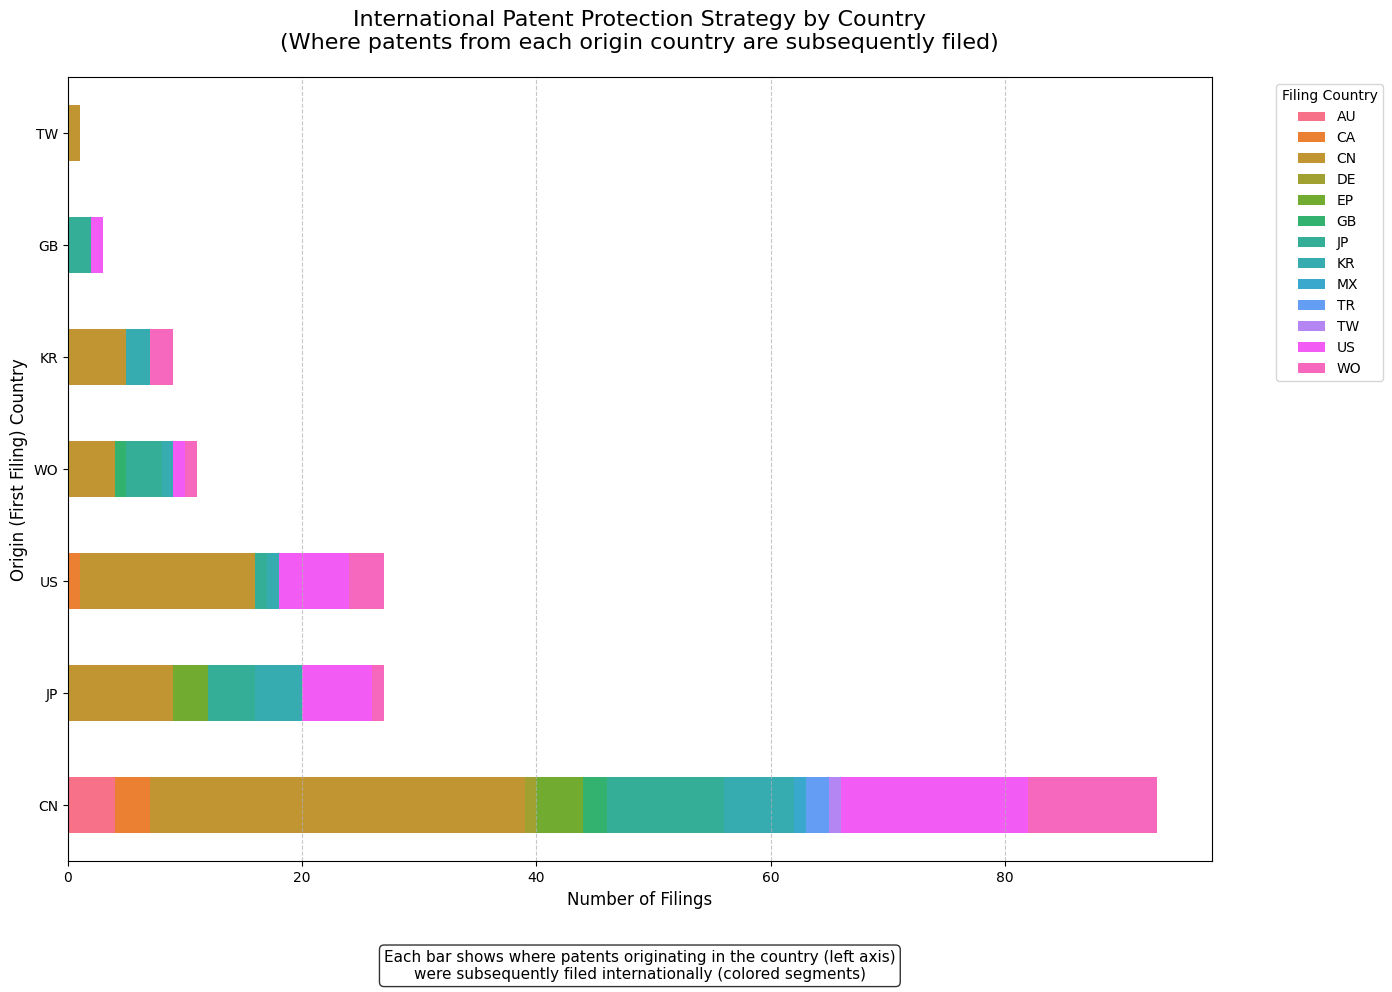

In [ ]:
# Call the function with your DataFrames
result_df = plot_patent_filing_relationships(family_df_copy, df)

In [ ]:
def plot_patent_receipts(family_df, main_df):
    """
    Visualizes the international flow of patents - showing which countries send patents to others.
    
    Parameters:
    - family_df: DataFrame containing 'country_codes' (list of countries where each patent was filed)
    - main_df: Original DataFrame containing 'first publication country' (country where each patent originated)
    """
    # Build relationship data
    records = []
    for idx, row in family_df.iterrows():
        source = main_df.loc[idx, 'first publication country']
        for receiver in row['country_codes']:
            records.append({
                'source_country': source,
                'receiver_country': receiver
            })
    
    relation_df = pd.DataFrame(records)
    
    # Count and pivot the data
    grouped_df = relation_df.groupby(['receiver_country', 'source_country']).size().reset_index(name='count')
    pivot_df = grouped_df.pivot(index='receiver_country', columns='source_country', values='count').fillna(0)
    
    # Sort by total received patents (descending)
    pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
    
    # Create the visualization
    plt.figure(figsize=(14, 10))
    colors = sns.color_palette("husl", len(pivot_df.columns))
    
    # Plot the stacked horizontal bars
    pivot_df.plot(kind='barh', 
                 stacked=True, 
                 color=colors,
                 ax=plt.gca())
    
    # Enhanced titles and labels
    plt.title('International Patent Flow: Where Countries Receive Their Patents From\n'
             '(Shows which countries file patents in each jurisdiction)',
             fontsize=16, pad=20)
    
    plt.xlabel('Total Number of Patents Received', fontsize=12)
    plt.ylabel('Patent Receiving Country', fontsize=12)
    
    # Improved legend
    plt.legend(title='Patent Origin Countries', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left',
               fontsize=10,
               frameon=True)
    
    # Add explanatory note
    plt.annotate('Each bar represents a country that receives patents\n'
                'Colors show which countries those patents originally came from\n'
                'Longer bars indicate more total patent filings in that country',
                xy=(0.5, -0.15),
                xycoords='axes fraction',
                ha='center',
                fontsize=11,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Make room for annotation
    plt.show()
    
    return pivot_df

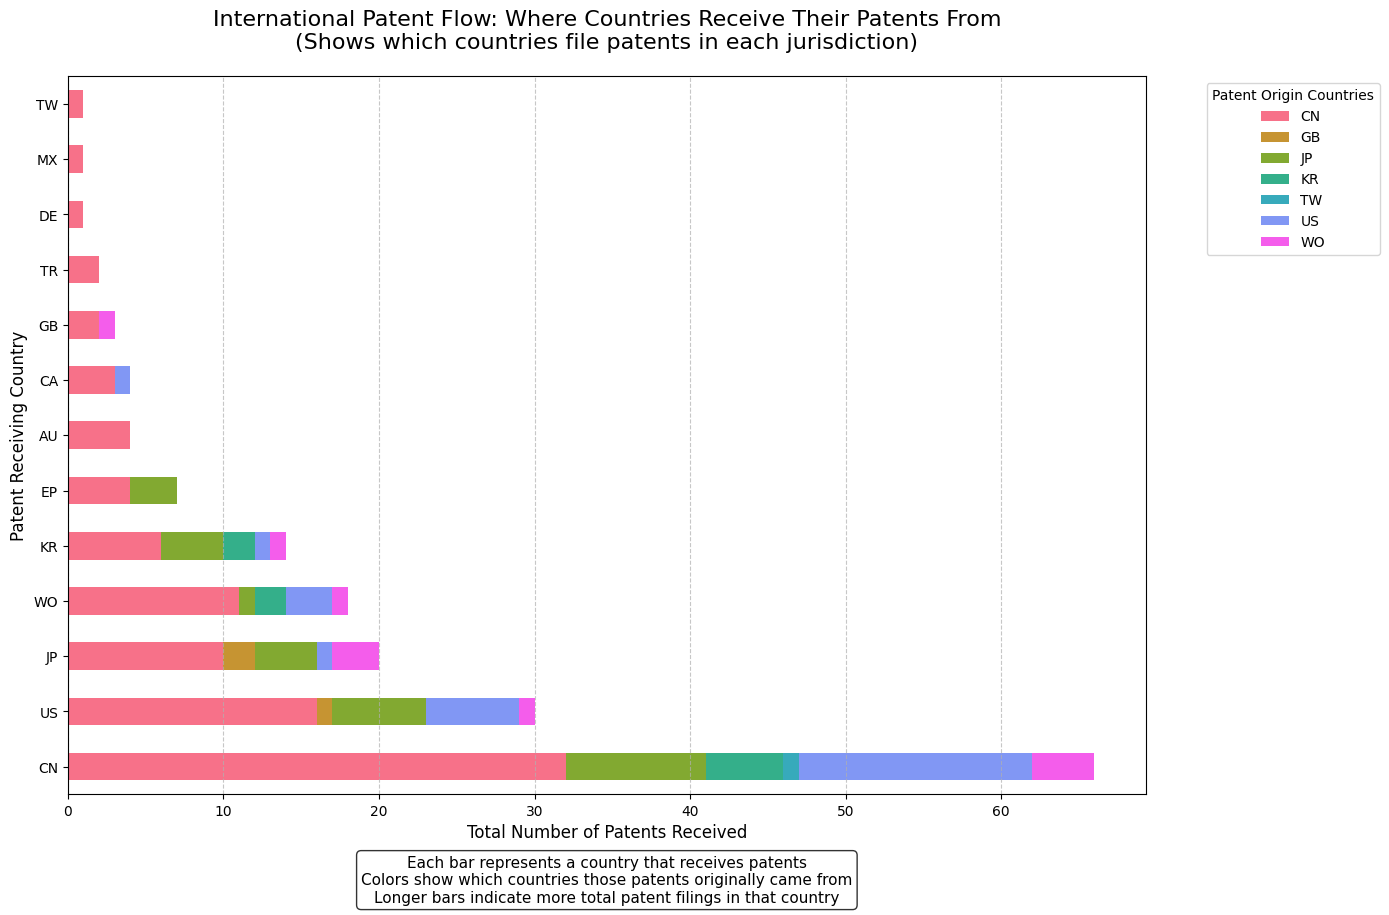

In [ ]:
receipt_df = plot_patent_receipts(family_df_copy, df)

In [ ]:
#pivot_df.to_excel('pivot_table.xlsx')

In [ ]:
family_counts_df.head()

,country_code,member_count
0,CN,66
1,US,30
2,JP,20
3,WO,18
4,KR,14


In [ ]:
#family_counts_df.to_csv('family_pub_country_counts.csv')

trend over time

C:\Users\tasni\AppData\Local\Temp\ipykernel_388\2954057496.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Publication Year'] = pd.to_datetime(df['Publication date'], errors='coerce', infer_datetime_format=True).dt.year


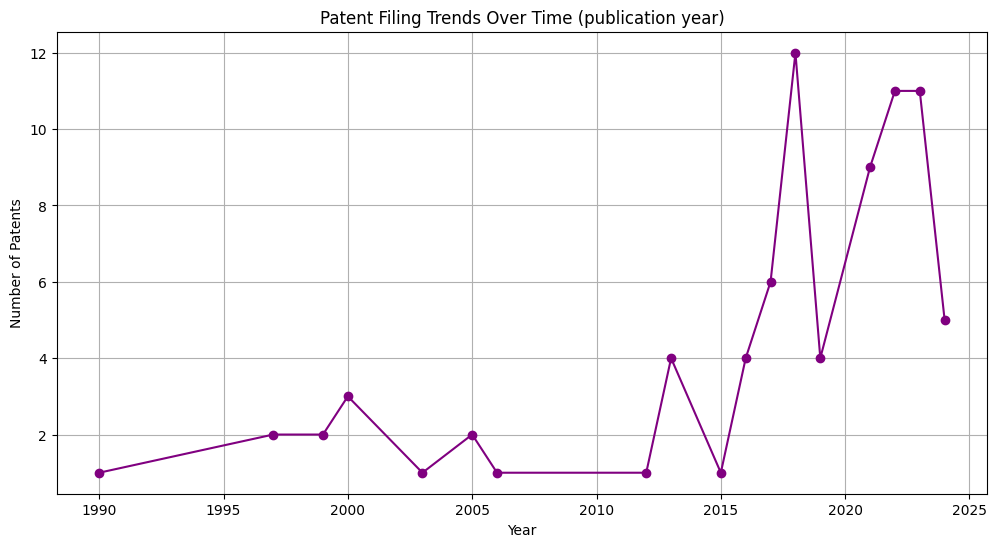

In [ ]:
# Extract year from publication date (assuming format: 'YYYY-MM-DD')
df['Publication Year'] = pd.to_datetime(df['Publication date'], errors='coerce', infer_datetime_format=True).dt.year

# Count patents by year
yearly_counts = df['Publication Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Patent Filing Trends Over Time (publication year)')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.grid(True)
plt.show()


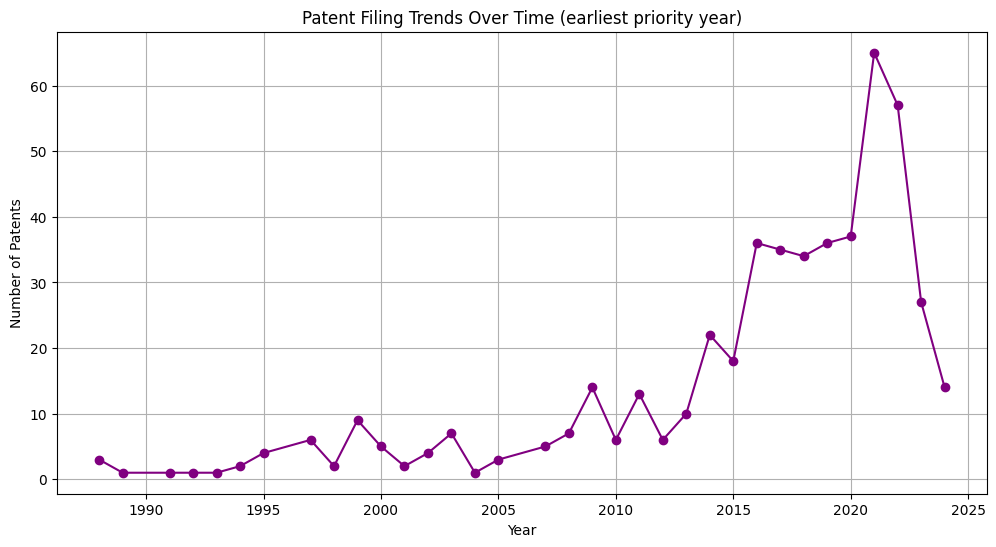

In [ ]:
# Extract year from publication date (assuming format: 'YYYY-MM-DD')
#df['Publication Year'] = pd.to_datetime(df['Publication date'], errors='coerce', infer_datetime_format=True).dt.year

# Count patents by year
yearly_counts = df['earliest priority year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Patent Filing Trends Over Time (earliest priority year)')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.grid(True)
plt.show()


word cloud for innovation themes

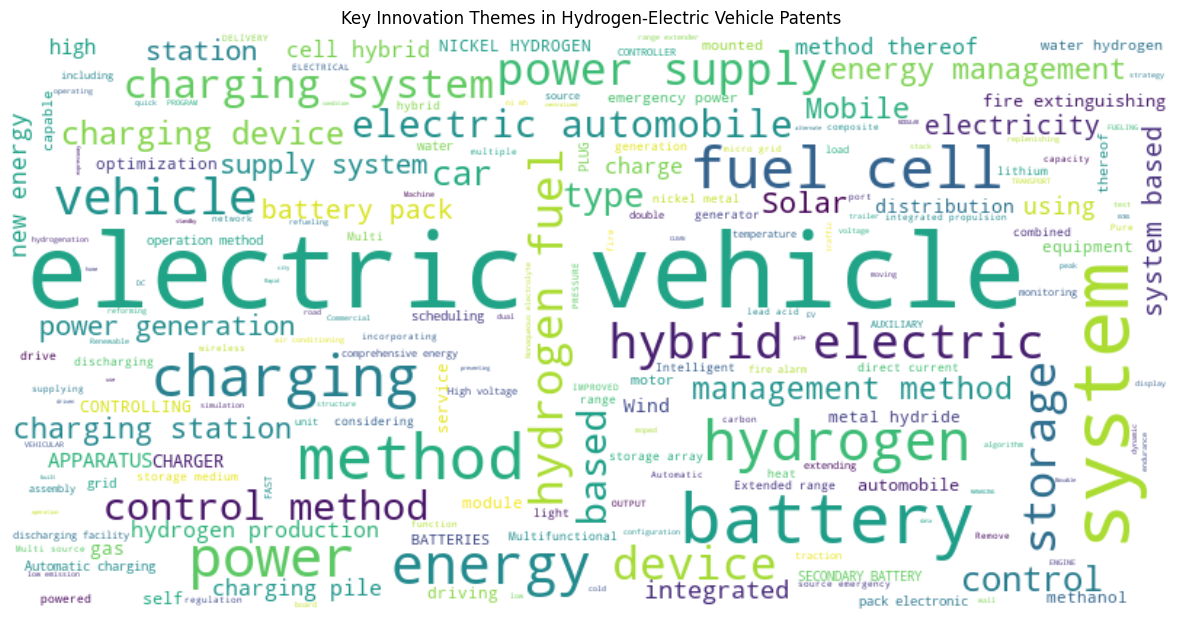

In [ ]:
# Combine all titles
text = ' '.join(df['Title'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Key Innovation Themes in Hydrogen-Electric Vehicle Patents')
plt.show()

Patent Age Distribution:


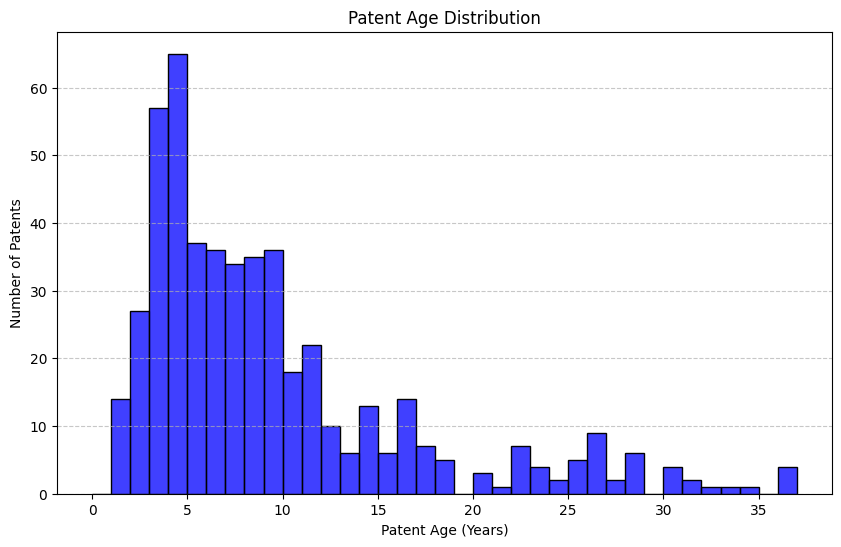

In [ ]:
age_distribution = df['Patent Age'].value_counts().sort_index()

# Display the distribution
print("Patent Age Distribution:")
#print(age_distribution)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Patent Age'], bins=range(0, df['Patent Age'].max() + 1), kde=False, color='blue')
plt.title('Patent Age Distribution')
plt.xlabel('Patent Age (Years)')
plt.ylabel('Number of Patents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()